# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

#### 📌 Project Overview:
This project aims to enhance marketing campaign effectiveness through customer segmentation and personality analysis. By analyzing customer data including demographics, spending behavior, and engagement metrics, the company seek to develop targeted marketing strategies that improve campaign performance and customer satisfaction. Our task here as a data analyst work with cross-functional teams of marketing and sales department, where the Marketing team will use your segmentation to optimize campaigns and customer communication, while the Sales team can leverage your insights to personalize their approach to different customer types.

#### 📌 Problem Definitions:
1. Customer Segmentation: How can we group customers into meaningful segments based on their characteristics and behaviors?

2. Campaign Optimization: How can we tailor marketing campaigns to different customer segments to improve response rates and conversion?

<!-- (Optional) -->
<!-- 3. Customer Lifetime Value Prediction: Can we predict which customers are likely to be most valuable in the long term?
4. Churn Prevention: How can we identify customers at risk of churning and develop retention strategies?
5. Cross-selling Opportunities: Which products should we recommend to different customer segments? -->

#### 📌 Assumptions (based on extracted/provided dataset):
1. The data provided is accurate and representative of the customer base.

2. Past behavior (purchases, website visits, campaign responses) is indicative of future behavior.

3. Demographic factors (age, education, marital status) influence purchasing decisions.

4. Customer complaints within the last 2 years significantly impact their relationship with the company.

5. The recency of a customer's last purchase is related to their likelihood of future purchases.

6. Customers who engage more frequently (website visits, purchases) are more valuable to the company.

### Import Libraries and Settings

In [43]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


> For extracting packages requirements (run in project directory terminal)

    pipreqs .
    pipreqs . --force

    pip freeze > requirements.txt

## Load Dataset

In [15]:
df = pd.read_csv('marketing_campaign_data.csv', index_col=0)

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

In stage 1, we are given the task to do conversion rate analysis based on Income, Spending and Age. We will continue to analyze all columns but at the end of task 1, we will be narrowed down to these features. Some suggested steps include:

- Perform Feature Engineering by calculating the conversion rate with the definition (#response / #visit). Not only conversion rate, but also find other representative features, such as age, number of children, total spending, total transactions, etc.

- Write down the Exploration Data Analysis (EDA) that you have done, starting from the plot you made to the interpretation analysis. Also write down the insights that can be used as recommendations.

## Data Understanding & Initial Transformation

In [23]:
df.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1025  8911        1967        S3        Menikah  56320000.0        0   
1595  1041        1973        S3         Lajang  48432000.0        0   
6      965        1971        S1          Cerai  55635000.0        0   
1272   195        1972        S1         Lajang  38808000.0        1   
947   8405        1979        S1          Cerai  68274000.0        1   
842   3312        1988        S1         Lajang  34176000.0        1   
1384   793        1973        S1        Menikah  20895000.0        1   
1410   618        1977        S3        Menikah  69389000.0        0   
1577  9298        1947        S3    Bertunangan  81574000.0        0   
1581  9952        1947        S2    Bertunangan  78093000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1025         1  08-04-2013       11   201000      53000           172000   
1595         1  18-10-2012        3   322000       3000            50000   
6            1  13-11-2012       34   235000      65000           164000   
1272         0  26-08-2012       21   125000      17000            52000   
947          1  30-09-2013       83   135000      25000            51000   
842          0  12-05-2014       12     5000       7000            24000   
1384         0  06-10-2012       24    18000       3000            17000   
1410         1  28-09-2012       17   422000       7000           238000   
1577         0  28-04-2014       89  1252000          0           465000   
1581         0  11-12-2013       53   368000      32000           639000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1025           116000             77000         83000                  3   
1595             4000              3000         42000                  5   
6               50000             49000         27000                  4   
1272             3000             19000         30000                  4   
947             23000             25000         46000                  2   
842             19000             14000         20000                  4   
1384             3000                 0          4000                  1   
1410            69000             46000         15000                  1   
1577            46000             35000             0                  1   
1581            13000             43000         10000                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1025                5                    4                  9   
1595                7                    1                  6   
6                   7                    3                  7   
1272                5                    1                  4   
947                 4                    2                  5   
842                 3                    0                  4   
1384                2                    0                  3   
1410                7                    2                 12   
1577                4                    5                  8   
1581                4                    7                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1025                  4             0             0             0   
1595                  8             0             0             0   
6                     6             0             0             0   
1272                  8             1             0             0   
947                   3             0             0             0   
842                   6             0             0             0   
1384                  9             0             0             0   
1410                  4             0             0             0   
1577                  1             0             1             1   
1581                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Reve

In [24]:
df.shape

(2240, 29)

> The dataset have 2240 rows and 29 columns

In [25]:
# Checking basic data information
def check_data_information(df, cols):
    """
    This function provides detailed information about each column in a dataframe, including:
    - Data type of the column
    - Number of missing (null) values
    - Percentage of missing values
    - Total number of duplicated rows in the dataframe (not column-specific)
    - Number of unique values in the column
    - A sample of up to 5 unique values from the column

    Parameters:
    df (pd.DataFrame): The dataframe you want to check.
    cols (list): List of column names to check the information from.

    Returns:
    pd.DataFrame: A dataframe with detailed information for each column.
    """
    list_item = []
    for col in cols:
        list_item.append([col,                             # The column name
                          df[col].dtype,                   # The data type of the column
                          df[col].isna().sum(),            # The count of null values in the column
                          round(100 * df[col].isna().sum() / len(df[col]), 2),  # The percentage of null values
                          df.duplicated().sum(),           # The count of duplicated rows in the entire dataframe
                          df[col].nunique(),               # The count of unique values in the column
                          df[col].unique()[:5]])           # A sample of the first 5 unique values in the column

    desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
    return desc_df

columns_to_check = df.columns
check_data_information(df, columns_to_check)

Feature  Data Type   Null Values   Null Percentage  \
0                    ID      int64             0              0.00   
1            Year_Birth      int64             0              0.00   
2             Education     object             0              0.00   
3        Marital_Status     object             0              0.00   
4                Income    float64            24              1.07   
5               Kidhome      int64             0              0.00   
6              Teenhome      int64             0              0.00   
7           Dt_Customer     object             0              0.00   
8               Recency      int64             0              0.00   
9               MntCoke      int64             0              0.00   
10            MntFruits      int64             0              0.00   
11      MntMeatProducts      int64             0              0.00   
12      MntFishProducts      int64             0              0.00   
13     MntSweetProducts      int64             0              0.00   
14         MntGoldProds      int64             0              0.00   
15    NumDealsPurchases      int64             0              0.00   
16      NumWebPurchases      int64             0              0.00   
17  NumCatalogPurchases      int64             0              0.00   
18    NumStorePurchases      int64             0              0.00   
19    NumWebVisitsMonth      int64             0              0.00   
20         AcceptedCmp3      int64             0              0.00   
21         AcceptedCmp4      int64             0              0.00   
22         AcceptedCmp5      int64             0              0.00   
23         AcceptedCmp1      int64             0              0.00   
24         AcceptedCmp2      int64             0              0.00   
25             Complain      int64             0              0.00   
26        Z_CostContact      int64             0              0.00   
27            Z_Revenue      int64             0              0.00   
28             Response      int64             0              0.00   

     Duplicated Values   Unique Values  \
0                    0            2240   
1                    0              59   
2                    0               5   
3                    0               6   
4                    0            1974   
5                    0               3   
6                    0               3   
7                    0             663   
8                    0             100   
9                    0             776   
10                   0             158   
11                   0             558   
12                   0             182   
13                   0             177   
14                   0             213   
15                   0              15   
16                   0              15   
17                   0              14   
18                   0              14   
19                   0              16   
20                   0               2   
21                   0               2   
22                   0               2   
23                   0               2   
24                   0               2   
25                   0               2   
26                   0               1   
27                   0               1   
28                   0               2   

                                                   Unique Sample  
0                                 [5524, 2174, 4141, 6182, 5324]  
1                                 [1957, 1954, 1965, 1984, 1981]  
2                                          [S1, S3, S2, SMA, D3]  
3                   [Lajang, Bertunangan, Menikah, Cerai, Janda]  
4   [58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0]  
5                                                      [0, 1, 2]  
6                                                      [0, 1, 2]  
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014]  
8                                           [58, 38

Here is the table with two additional columns for data type and more specific data type information:

| **Feature Name**       | **Description**                                                                  | **Data Type** | **Specific Data Type**   |
|------------------------|----------------------------------------------------------------------------------|----------------|-------------------------|
| `ID`                   | Unique identifier for each customer                                              | Categorical    | Nominal                 |
| `Year_Birth`           | Customer's year of birth                                                         | Numerical      | Discrete                |
| `Dt_Customer`          | Date of customer's registration with the company (joining date as a member)      | Datetime       | -                       |
| `Education`            | Customer's level of education                                                    | Categorical    | Ordinal                 |
| `Marital_Status`       | Customer's marital status                                                        | Categorical    | Nominal                 |
| `Kidhome`              | Number of small children in the customer's household                             | Numerical      | Discrete                |
| `Teenhome`             | Number of teenagers in the customer's household                                  | Numerical      | Discrete                |
| `Income`               | Customer's household income per year                                             | Numerical      | Continuous              |
| `MntFishProducts`      | Amount spent on fish products in the last 2 years                                | Numerical      | Continuous              |
| `MntMeatProducts`      | Amount spent on meat products in the last 2 years                                | Numerical      | Continuous              |
| `MntFruits`            | Amount spent on fruit products in the last 2 years                               | Numerical      | Continuous              |
| `MntSweetProducts`     | Amount spent on sweet products in the last 2 years                               | Numerical      | Continuous              |
| `MntWines`             | Amount spent on wine products in the last 2 years                                | Numerical      | Continuous              |
| `MntGoldProds`         | Amount spent on gold products in the last 2 years                                | Numerical      | Continuous              |
| `NumDealsPurchases`    | Number of purchases made with a discount                                         | Numerical      | Discrete                |
| `NumCatalogPurchases`  | Number of purchases made using a catalog (buying items to be shipped via mail)   | Numerical      | Discrete                |
| `NumStorePurchases`    | Number of purchases made directly in stores                                      | Numerical      | Discrete                |
| `NumWebPurchases`      | Number of purchases made through the company's website                           | Numerical      | Discrete                |
| `AcceptedCmp1`         | Whether the customer acceppt the first campaign or not                           | Categorical    | Nominal                 |
| `AcceptedCmp2`         | Whether the customer acceppt the second campaign or not                          | Categorical    | Nominal                 |
| `AcceptedCmp3`         | Whether the customer acceppt the third campaign or not                           | Categorical    | Nominal                 |
| `AcceptedCmp4`         | Whether the customer acceppt the fourth campaign or not                          | Categorical    | Nominal                 |
| `AcceptedCmp5`         | Whether the customer acceppt the fifth campaign or not                           | Categorical    | Nominal                 |
| `Complain`             | 1 if the customer complained in the last 2 years                                 | Categorical    | Nominal                 |
| `Recency`              | Number of days since the customer's last purchase                                | Numerical      | Discrete                |
| `Response`             | 1 if the customer responded to the offer in the last campaign, 0 if not          | Categorical    | Nominal                 |

In [ ]:
# Grouping columns based on data types (for column iteration later in EDA and others)
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [ ]:
# # (Optional) Checking every unique values in categorical or numerical columns
# for col in cats_cols :
#     print()
#     print(f"{col} : {df[col].unique()}")

# for col in nums_cols :
#     print()
#     print(f"{col} : {df[col].unique()}")

Kinda curios about the `Response` column, it should be based on the last campaign (AcceptedCmp5) based on the definition, so we will just validate that first.

In [29]:
# Validate the value of `Response` column
response_validation = df[["AcceptedCmp5", "Response"]]
response_validation["Validate"] = response_validation.apply(lambda x: True if x["AcceptedCmp5"] == x["Response"] else False, axis=1)

print(f"Numebr of data : {len(df)}")
print(f"Number of correct hypothesis : {len(response_validation[response_validation['Validate'] == True])}")
response_validation

Numebr of data : 2240
Number of correct hypothesis : 1927


AcceptedCmp5  Response  Validate
0                0         1     False
1                0         0      True
2                0         0      True
3                0         0      True
4                0         0      True
...            ...       ...       ...
2235             0         0      True
2236             0         0      True
2237             0         0      True
2238             0         0      True
2239             0         1     False

[2240 rows x 3 columns]

Since it's not 100% true, so the definition of `Response` column is kinda confusing in this dataset, but we will move on for now. This problem could potentially arise from using the wrong logic in joining different dimension and fact tables.

Other than `Dt_Customer` that we will convert to datetime (currently string), every features have the correct data types.

In [36]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [31]:
# Change Dt_Customer to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

`Income` column is the only column that have missing value and the percentage is small so we will handle it here rather than in the pre-processing step, we will do imputation based on the distribution.

<Axes: xlabel='Income', ylabel='Count'>

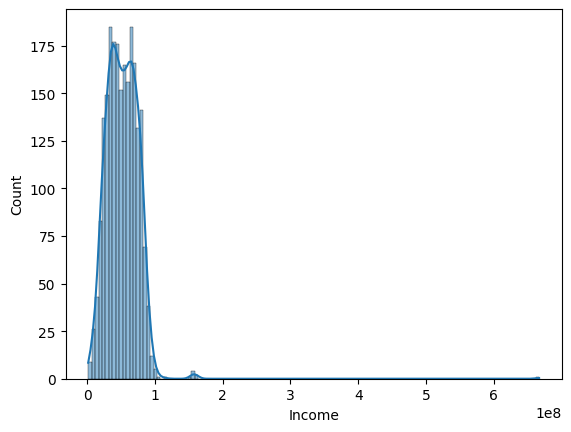

In [32]:
# Quick Check in income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median that is robust to outliers.

In [33]:
# Fill missing Income values with median 
df['Income'] = df['Income'].fillna(df['Income'].median())

## Handling Outliers

In [16]:
len(df[nums_cols].columns)

18

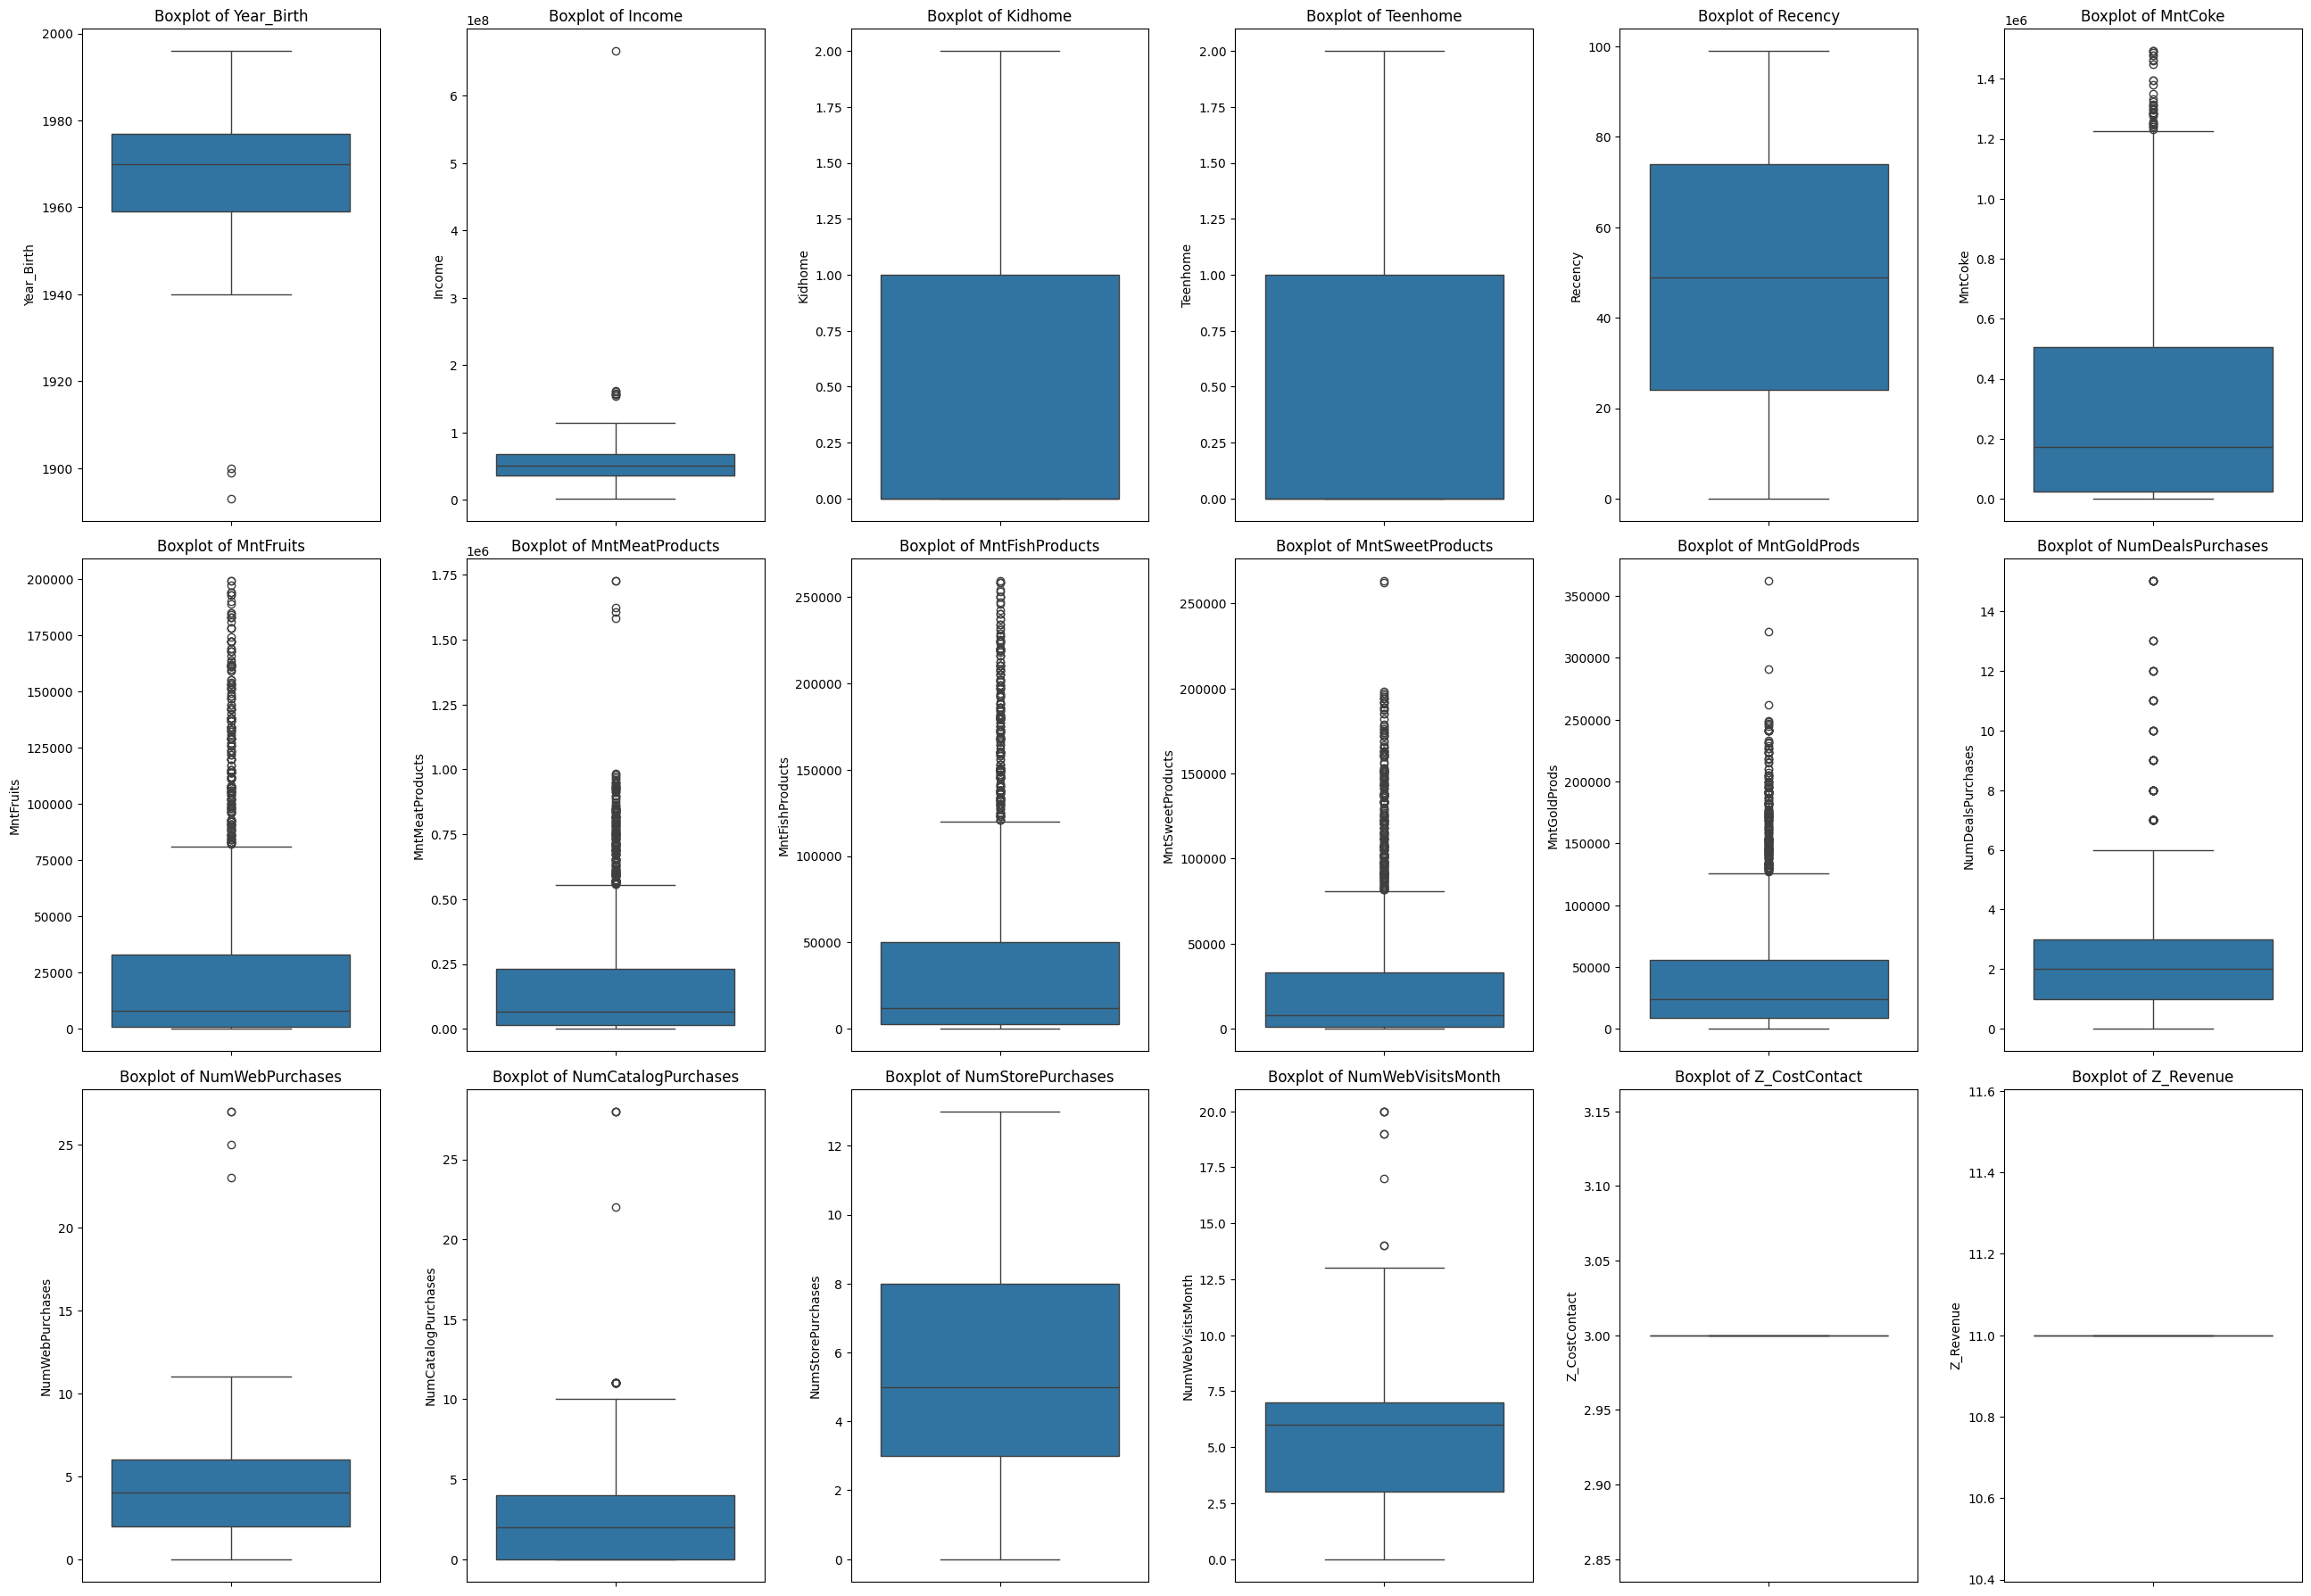

In [94]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26, 18))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.boxplot(data=df, ax=ax[i], y=col, orient='v')
    ax[i].set_title(f'Boxplot of {col}')

# Remove the last subplot if there are fewer features than subplots
if len(nums_cols) < len(ax):
    for j in range(len(nums_cols), len(ax)):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [18]:
# Detect outliers in dataframe using IQR method
def outlier_detection(df):
    """
    Function to detect outliers in a dataframe using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    pd.DataFrame: A summary dataframe showing the number of outliers and non-outliers 
                  for each numeric column, along with the IQR bounds.
    """
    print(f'Amount of Rows: {len(df)}')
    
    outlier = []  # Store the number of outlier rows per column
    no_outlier = []  # Store the number of non-outlier rows per column
    is_outlier = []  # Boolean indicating whether any outliers exist in the column
    low_bound = []  # Lower bound for outliers (Q1 - 1.5 * IQR)
    high_bound = []  # Upper bound for outliers (Q3 + 1.5 * IQR)

    # Start with all rows marked as True (non-outliers) in the cumulative filter
    filtered_entries = np.array([True] * len(df))

    for col in nums_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)

        # Create a filter that identifies non-outliers for the current column
        filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

        # Append the statistics and filter results
        outlier.append(len(df[~filter_outlier]))  # Count of outliers
        no_outlier.append(len(df[filter_outlier]))  # Count of non-outliers
        is_outlier.append(df[col][~filter_outlier].any())  # Whether any outliers exist
        low_bound.append(lower_bound)  # Lower IQR bound
        high_bound.append(upper_bound)  # Upper IQR bound

        # Update the cumulative filter to only include rows that are non-outliers across all columns
        filtered_entries = filtered_entries & filter_outlier

    # Final printout of cumulative outlier statistics across all columns
    print(f'Amount of Outlier Rows (Across All Columns): {len(df[~filtered_entries])}')
    print(f'Amount of Non-Outlier Rows (Across All Columns): {len(df[filtered_entries])}')
    print(f'Percentage of Outliers: {round(len(df[~filtered_entries]) / len(df) * 100, 2)}%')
    print()

    # Create a summary dataframe
    check_outliers = pd.DataFrame({
        'Column Name': nums_cols,
        'Outlier Exist': is_outlier,
        'Lower Limit': low_bound,
        'Upper Limit': high_bound,
        'Outlier Data': outlier,
        'Non-Outlier Data': no_outlier
    })

    return check_outliers

outlier_summary = outlier_detection(df)
outlier_summary

Amount of Rows: 2240
Amount of Outlier Rows (Across All Columns): 706
Amount of Non-Outlier Rows (Across All Columns): 1534
Percentage of Outliers: 31.52%



Column Name  Outlier Exist  Lower Limit  Upper Limit  \
0            Year_Birth           True       1932.0       2004.0   
1                Income           True  -13587750.0  117416250.0   
2               Kidhome          False         -1.5          2.5   
3              Teenhome          False         -1.5          2.5   
4               Recency          False        -51.0        149.0   
5               MntCoke           True    -697000.0    1225000.0   
6             MntFruits           True     -47000.0      81000.0   
7       MntMeatProducts           True    -308000.0     556000.0   
8       MntFishProducts           True     -67500.0     120500.0   
9      MntSweetProducts           True     -47000.0      81000.0   
10         MntGoldProds           True     -61500.0     126500.0   
11    NumDealsPurchases           True         -2.0          6.0   
12      NumWebPurchases           True         -4.0         12.0   
13  NumCatalogPurchases           True         -6.0         10.0   
14    NumStorePurchases          False         -4.5         15.5   
15    NumWebVisitsMonth           True         -3.0         13.0   
16        Z_CostContact          False          3.0          3.0   
17            Z_Revenue          False         11.0         11.0   

    Outlier Data  Non-Outlier Data  
0              3              2237  
1              8              2232  
2              0              2240  
3              0              2240  
4              0              2240  
5             35              2205  
6            227              2013  
7            175              2065  
8            223              2017  
9            248              1992  
10           207              2033  
11            86              2154  
12             4              2236  
13            23              2217  
14             0              2240  
15             8              2232  
16             0              2240  
17             0              2240

**Major Findings:**

There are outliers in the following columns: Year_Birth, Income, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumWebVisitMonth.

- In the `Year_Birth` column, outliers are below 1932.
- In the `Income` column, outliers are above 117M.
- In the `MntCoke` column, outliers are above 1.2M.
- In the `MntFruits` column, outliers are around 81k.
- In the `MntMeatProducts` column, the farthest outlier is around 1.75M.
- In the `MntFishProducts` column, outliers are around 125k to above 250k.
- In the `MntSweetProducts` column, the farthest outlier is around 250k.
- In the `MntGoldProds` column, the farthest outlier is around 350k.
- In the `NumDealsPurchases` column, the farthest outlier is at 15.
- In the `NumWebPurchases` column, outliers are around 25.
- In the `NumCatalogPurchases` column, the farthest outlier is above 25.
- In the `NumWebVisitsMonth` column, the farthest outlier is at 20.

**Steps to be taken in this initial data pre-Processing:**
- Apply `log transformation` for feature scaling and handling outliers, as this transformation minimizes outliers and potentially helps to obtain a bell-shaped/normal distribution. This choice is maybe appropriate due to the limited data available that is only 2240 rows, and it avoids the need to delete data points.

- Alternatively, cleaning the data by removing outliers based on IQR or Z-score, but it will reduce the amount of available data.

In this case, since we want to keep the data as it is because transforming the whole values in many columns will result in changing the conclusion of our data, so the choice will be removing outliers with Z-score method **but not in all of the columns**, only several columns that have really extreme outliers like `Year_Birth`, `Income`, `MntMeatProducts`, `MntSweetProducts`, `NumWebPurchases`, `NumCatalogPurchases`.

In [19]:
# Handling the outliers in dataframe using IQR method
def outlier_handling(df, cols):
    """
    Function to remove outliers from specific columns of a dataframe using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    cols (list): List of column names to remove outliers from.
    
    Returns:
    pd.DataFrame: A new dataframe with outliers removed for the specified columns.
    """
    print(f'Rows before removing outliers: {len(df)}')

    # Start with all rows marked as True (non-outliers)
    filtered_entries = np.array([True] * len(df))
    
    # Loop through each column and apply IQR outlier detection
    for col in cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - (IQR * 1.5)  # Lower bound for outliers
        upper_bound = Q3 + (IQR * 1.5)  # Upper bound for outliers

        # Create a filter that identifies non-outliers for the current column
        filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

        # Update the filter to exclude rows that have outliers in the current column
        filtered_entries = filtered_entries & filter_outlier

    # Create a new dataframe by applying the cumulative filter
    df_filtered_outliers = df[filtered_entries]

    print(f'Rows after removing outliers: {len(df_filtered_outliers)}')
    
    return df_filtered_outliers

columns_to_filter = ['Year_Birth', 'Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']
df_filtered_outliers = outlier_handling(df, columns_to_filter)
df_filtered_outliers

Rows before removing outliers: 2240
Rows after removing outliers: 1861


ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

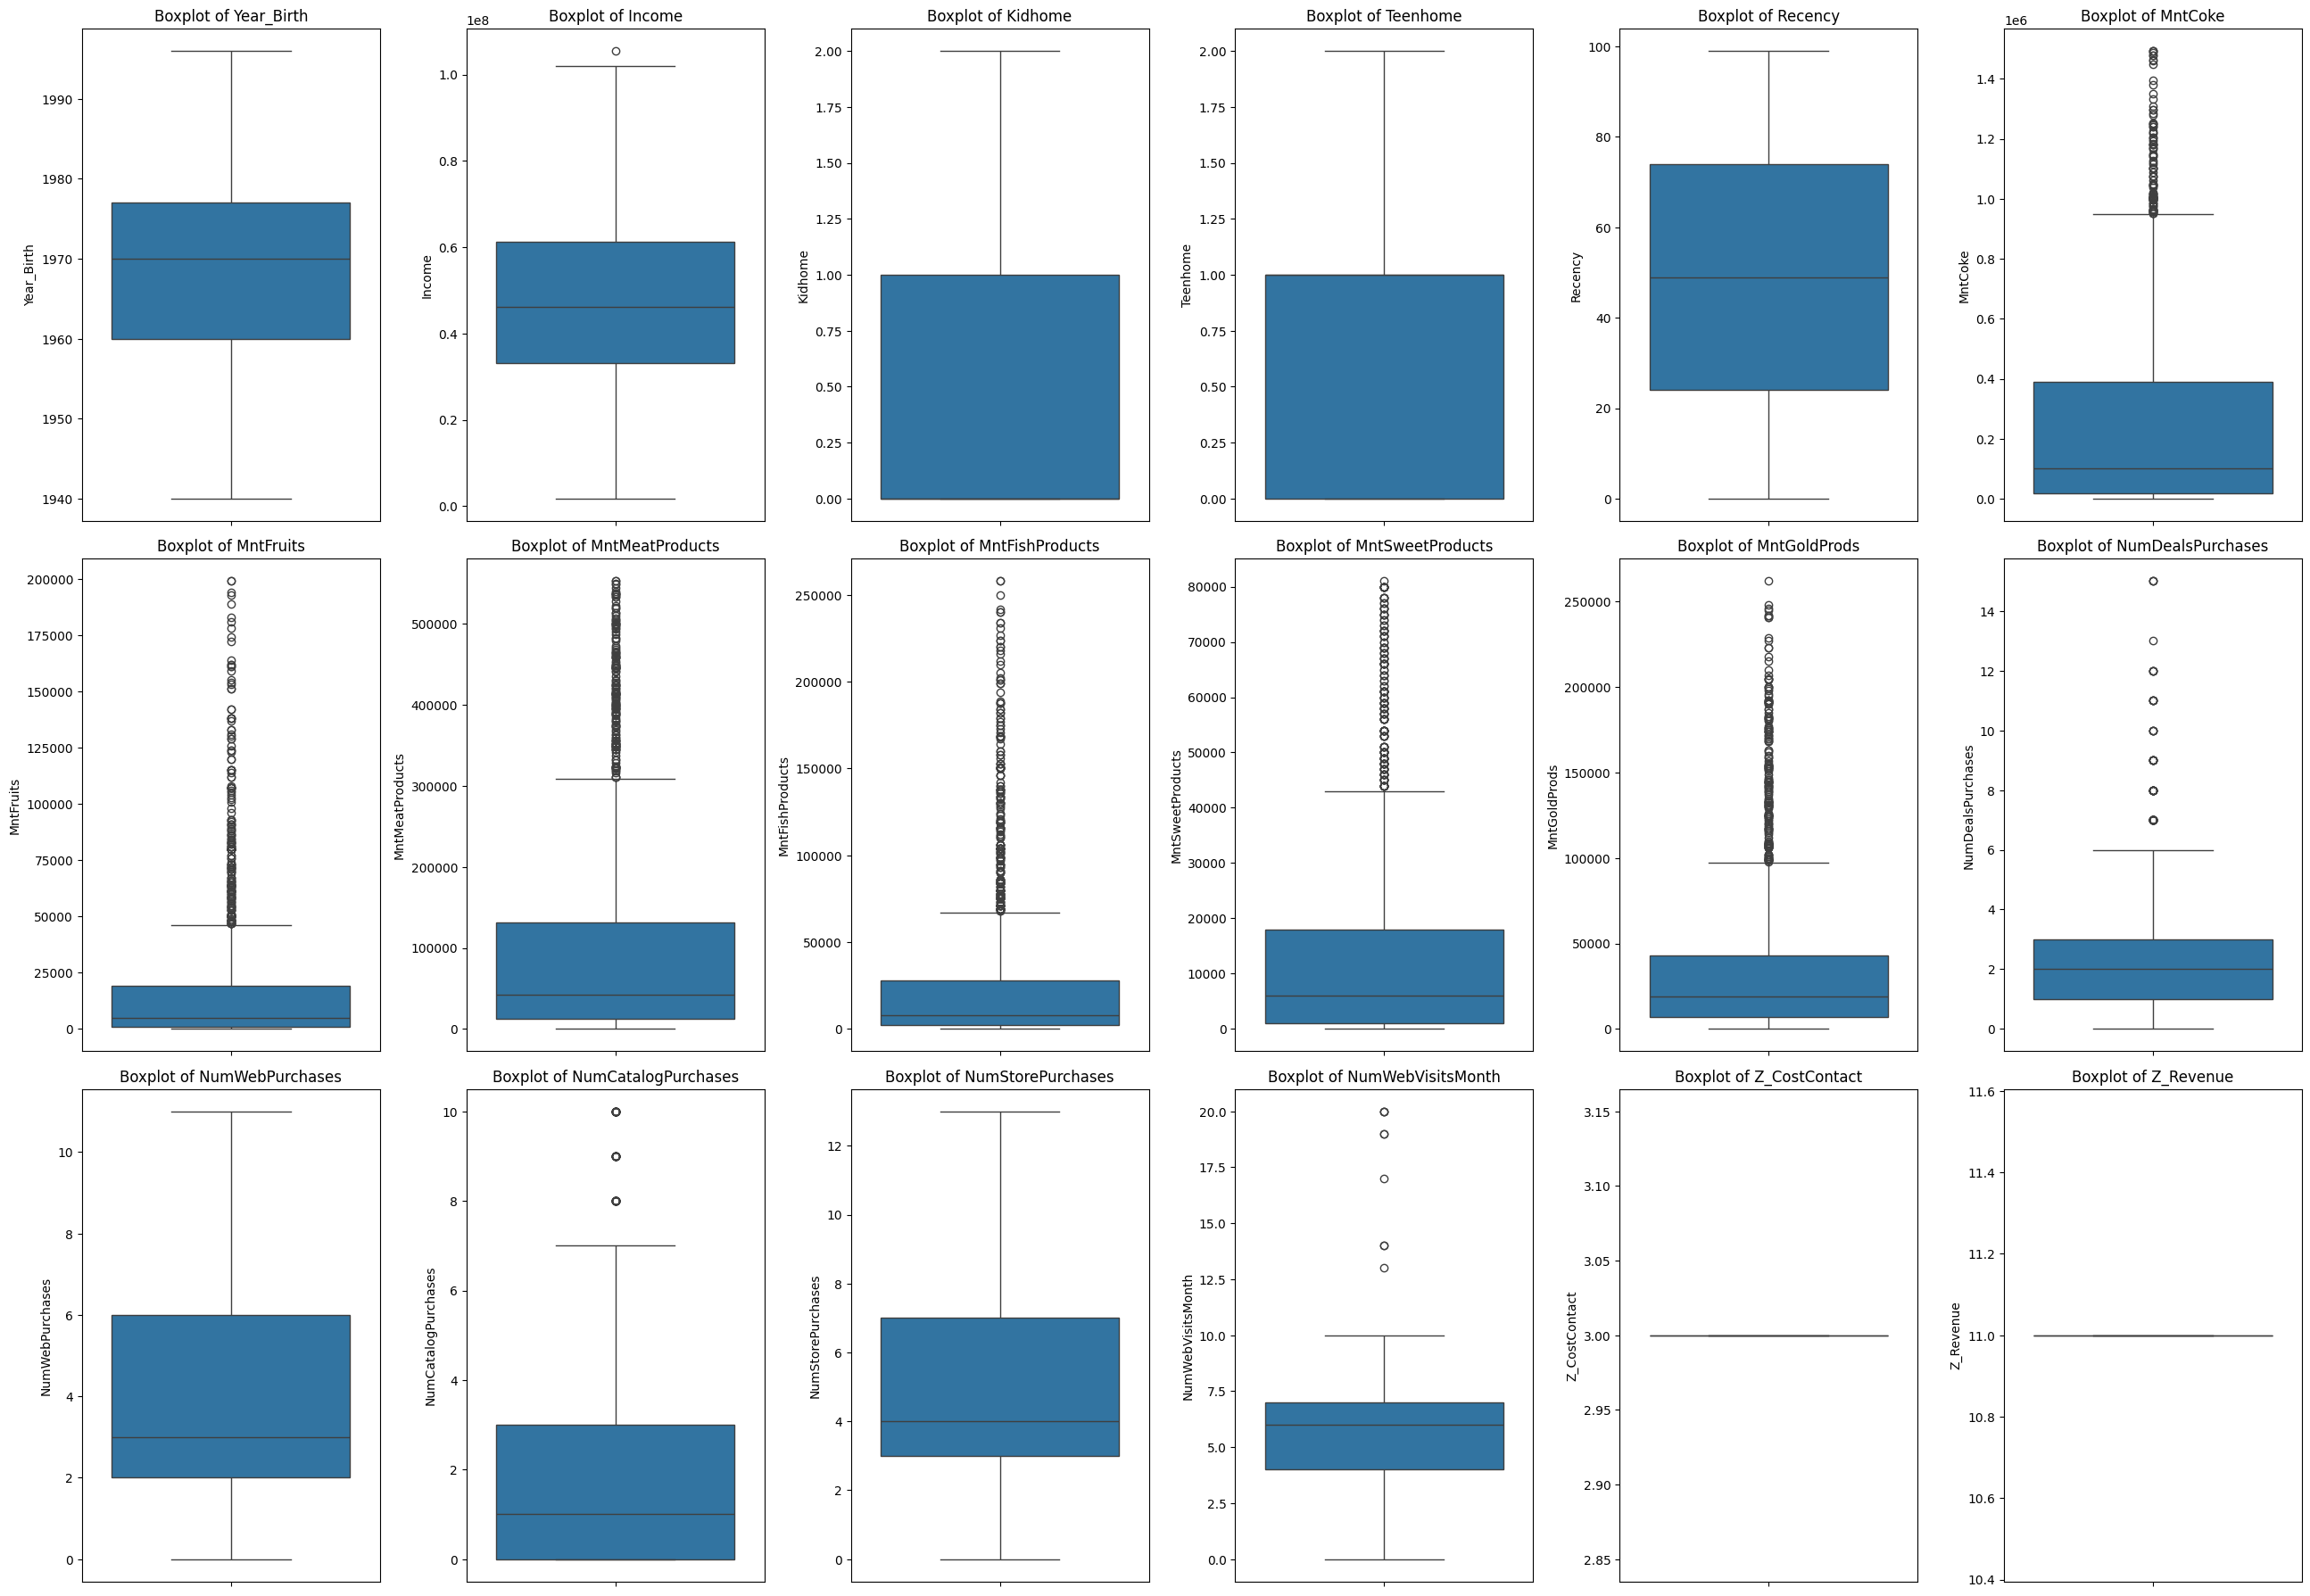

In [20]:
# Check data after filtered
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df_filtered_outliers, ax=ax[i], y=col, orient='v')
    ax[i].set_title(f'Boxplot of {col}')

# Remove the last subplot if there are fewer features than subplots
if len(nums_cols) < len(ax):
    for j in range(len(nums_cols), len(ax)):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Feature Engineering

### Age Column

The `Age` column is created by calculating the age of each customer based on their birth year and current time. But since we don't really have the year information in the data for this purpose, so we will just use the year now

In [21]:
# Age feature engineering

# from datetime import datetime
# year_data = datetime.now().year()
year_data = 2024
df_filtered_outliers['Age'] = year_data - df_filtered_outliers['Year_Birth']

### Age Group Column

The `Age_Group` column is created by grouping the `age` column. But first we need check the distribution of age to help with the grouping range.

<Axes: xlabel='Age', ylabel='Count'>

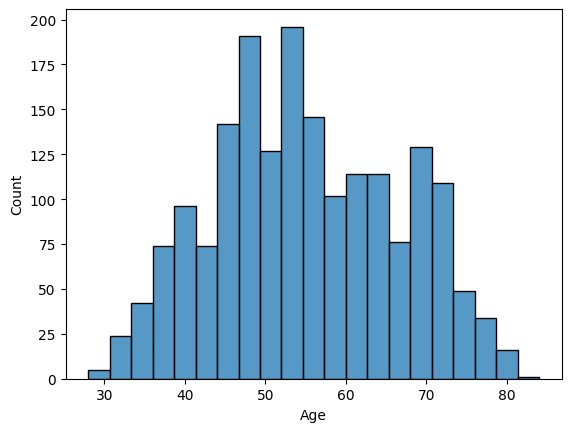

In [22]:
sns.histplot(data=df_filtered_outliers, x='Age')

In [23]:
# Age grouping
def age_group(x):
    if x >= 60:
        return 'Senior Adult'
    elif x >= 40:
        return 'Middle Adult'
    else:
        return 'Young Adult'

df_filtered_outliers['Age_Group'] = df_filtered_outliers['Age'].apply(age_group)

In [24]:
df_filtered_outliers['Age_Group'].value_counts()

Age_Group
Middle Adult    1045
Senior Adult     642
Young Adult      174
Name: count, dtype: int64

### Num_Child Column

The `Num_Child` column is created by summing the values of Kidhome and Teenhome, representing the total number of dependents or children a customer has.

In [25]:
df_filtered_outliers['Num_Child'] = df_filtered_outliers['Kidhome'] + df_filtered_outliers['Teenhome']

In [26]:
df_filtered_outliers['Num_Child'].value_counts()

Num_Child
1    1037
2     410
0     362
3      52
Name: count, dtype: int64

### Membership_Duration Column

The `Membership_Duration` column represents duration of customer membership in year.

In [27]:
df_filtered_outliers['Membership_Duration'] = 2024 - df_filtered_outliers['Dt_Customer'].dt.year

In [28]:
df_filtered_outliers['Membership_Duration'].value_counts()

Membership_Duration
11    989
10    475
12    397
Name: count, dtype: int64

### Total_Acc_Camp Column

The `Total_Acc_Camp` column represents the total number of times each customer responded to the 5 campaigns that were conducted (AcceptedCmp 1 - 5).

In [29]:
df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1).astype('int64')

# df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers.filter(like='AcceptedCmp').sum(axis=1).astype("int64")

In [30]:
df_filtered_outliers['Total_Acc_Camp'].value_counts()

Total_Acc_Camp
0    1539
1     245
2      55
3      15
4       7
Name: count, dtype: int64

### Total_Spending Column

The `Total_Spending` column represents the total purchase amount of each customer across all products.

In [31]:
df_filtered_outliers['Total_Spending'] = df_filtered_outliers.loc[:, ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1).astype('int64')

### Total_Purchases Column

The `Total_Purchases` column represents the total purchase amount of each customer across all types of transactions.

In [32]:
df_filtered_outliers['Total_Purchases'] = df_filtered_outliers.loc[:, ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1).astype('int64')

### CVR (Conversion Rate) Column

The `CVR` column is calculated as the ratio of `Total Purchases` to the `Number of Web Visits` for each customer. It represents the percentage of website visitors who made purchases.

In [33]:
df_filtered_outliers['CVR'] = np.round(df_filtered_outliers['Total_Purchases'] / df_filtered_outliers['NumWebVisitsMonth'], 2)
df_filtered_outliers['CVR'].fillna(0, inplace=True)
df_filtered_outliers['CVR'].replace([np.inf, -np.inf], 0, inplace=True)

#### Additional Information related to Calculation of CVR

- **CVR (Conversion Rate)**: This metric is a key performance indicator in marketing and e-commerce that measures the effectiveness of a campaign or a website in converting visitors into customers. It indicates the percentage of visitors who complete a desired action (e.g., making a purchase).
  
The Conversion Rate (CVR) is calculated as:

$$
\text{CVR} = \left(\frac{\text{Number of Conversions}}{\text{Total Visitors}}\right) \times 100
$$

#### Interpretation
- A higher CVR indicates that a larger percentage of visitors are converting, which is typically a positive sign for marketing effectiveness.
- Conversely, a low CVR might suggest issues with the website's usability, targeting, or product appeal.

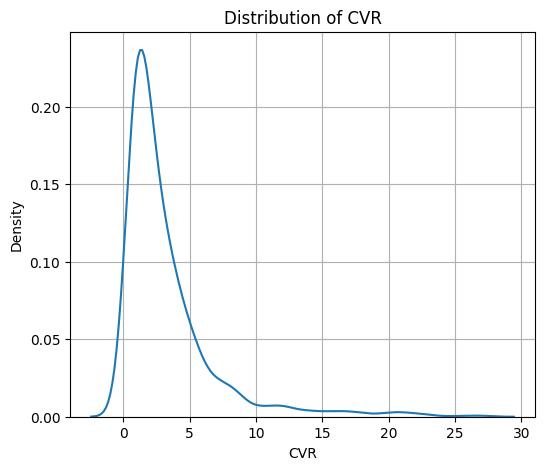

In [34]:
# Plot the CVR distribution
plt.figure(figsize=(6, 5))
sns.kdeplot(data=df_filtered_outliers, x='CVR')
plt.title("Distribution of CVR")
plt.grid()
plt.show()

# **Further Exploratory Data Analysis (EDA)**

> Usually this step is done first and the original data is kept still raw. But since for the task 1 requirement steps for answering the main question related to CVR, then only for this case we applied some data processing steps (handling outliers and feature engineering) in the beginning.

## Statistical Summary

In [35]:
df_filtered_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Num_Child', 'Membership_Duration',
       'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR'],
      dtype='object')

In [36]:
# Grouping columns based on data types with new featured engineered columns
new_nums_cols = ['Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']
new_cats_cols = ['Age_Group']

desc_cols = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']

# Additional column grouping only for easily visible comparison
product_spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_type_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [37]:
# Product spending statistics
desc_stats_spending = df_filtered_outliers[product_spending_cols + ['Total_Spending']].describe().transpose()
sum_stats_spending = pd.DataFrame(df_filtered_outliers[product_spending_cols + ['Total_Spending']].sum().rename('sum'))

# Combine the descriptive statistics and the sum into one DataFrame
combined_stats = pd.concat([desc_stats_spending, sum_stats_spending], axis=1)
combined_stats

count           mean            std     min      25%  \
MntCoke           1861.0  250929.607738  315826.131031     0.0  18000.0   
MntFruits         1861.0   17241.805481   29502.972217     0.0   1000.0   
MntMeatProducts   1861.0   97452.982268  124804.873802     0.0  13000.0   
MntFishProducts   1861.0   25399.247716   42295.989533     0.0   2000.0   
MntSweetProducts  1861.0   13378.291241   18221.128038     0.0   1000.0   
MntGoldProds      1861.0   36454.594304   45760.957987     0.0   7000.0   
Total_Spending    1861.0  440856.528748  477667.786596  5000.0  57000.0   

                       50%       75%        max        sum  
MntCoke           100000.0  390000.0  1493000.0  466980000  
MntFruits           5000.0   19000.0   199000.0   32087000  
MntMeatProducts    42000.0  132000.0   553000.0  181360000  
MntFishProducts     8000.0   28000.0   258000.0   47268000  
MntSweetProducts    6000.0   18000.0    81000.0   24897000  
MntGoldProds       19000.0   43000.0   262000.0   67842000  
Total_Spending    231000.0  734000.0  2231000.0  820434000

In [38]:
# Purchase type statistics
desc_stats_purchase = df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].describe().transpose()
sum_stats_purchase = df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].sum().rename('sum')

# Combine the descriptive statistics and the sum into one DataFrame
combined_stats = pd.concat([desc_stats_purchase, sum_stats_purchase], axis=1)
combined_stats

count       mean       std  min  25%   50%   75%   max  \
NumDealsPurchases    1861.0   2.465879  1.865228  0.0  1.0   2.0   3.0  15.0   
NumWebPurchases      1861.0   3.787211  2.619379  0.0  2.0   3.0   6.0  11.0   
NumCatalogPurchases  1861.0   2.002687  2.328527  0.0  0.0   1.0   3.0  10.0   
NumStorePurchases    1861.0   5.309511  3.066794  0.0  3.0   4.0   7.0  13.0   
Total_Purchases      1861.0  13.565287  7.418566  0.0  7.0  12.0  20.0  35.0   

                       sum  
NumDealsPurchases     4589  
NumWebPurchases       7048  
NumCatalogPurchases   3727  
NumStorePurchases     9881  
Total_Purchases      25245

In [39]:
# Important metric column statistics
df_filtered_outliers[desc_cols].describe().transpose()

count          mean           std        min  \
Income               1861.0  4.699597e+07  1.856569e+07  1730000.0   
Recency              1861.0  4.867544e+01  2.893846e+01        0.0   
Membership_Duration  1861.0  1.095809e+01  6.834176e-01       10.0   
Age                  1861.0  5.500430e+01  1.146692e+01       28.0   
Num_Child            1861.0  1.081677e+00  7.212538e-01        0.0   
Total_Acc_Camp       1861.0  2.299839e-01  5.743472e-01        0.0   
Total_Spending       1861.0  4.408565e+05  4.776678e+05     5000.0   
Total_Purchases      1861.0  1.356529e+01  7.418566e+00        0.0   
CVR                  1861.0  3.285562e+00  3.657562e+00        0.0   

                             25%         50%         75%          max  
Income               33178000.00  46102000.0  61209000.0  105471000.0  
Recency                    24.00        49.0        74.0         99.0  
Membership_Duration        10.00        11.0        11.0         12.0  
Age                        47.00        54.0        64.0         84.0  
Num_Child                   1.00         1.0         1.0          3.0  
Total_Acc_Camp              0.00         0.0         0.0          4.0  
Total_Spending          57000.00    231000.0    734000.0    2231000.0  
Total_Purchases             7.00        12.0        20.0         35.0  
CVR                         1.12         2.0         4.0         27.0

**Major Findings:**

- The majority of customers have an income of Rp46,999,597 per year.
- Most customers will shop again approximately 1.5 months after their last purchase.
- The majority of customers have been members for 11 years.
- Most customers have only one child.
- The majority of customers make 12 purchase transactions, with the highest number through Store Purchase.
- Most customers spend Rp.231,000, with the highest spending on Coke.
- The majority of customers did not receive the campaign.
- The conversion rate from web visits to purchases for the majority of customers is only 2.0%.

In [40]:
# Categorical column statistics
df_filtered_outliers[cats_cols + new_cats_cols].describe(exclude='int64').transpose()

count unique           top  freq
Education       1861      5            S1   914
Marital_Status  1861      6       Menikah   725
Age_Group       1861      3  Middle Adult  1045

In [41]:
# Datetime column statistics
df_filtered_outliers[date_cols].describe().transpose()

count                           mean                  min  \
Dt_Customer  1861  2013-07-15 00:58:48.425577728  2012-07-30 00:00:00   

                             25%                  50%                  75%  \
Dt_Customer  2013-01-22 00:00:00  2013-07-17 00:00:00  2014-01-05 00:00:00   

                             max  
Dt_Customer  2014-06-29 00:00:00

## Univariate Analysis

In [42]:
len(desc_cols)

9

### Numerical Columns

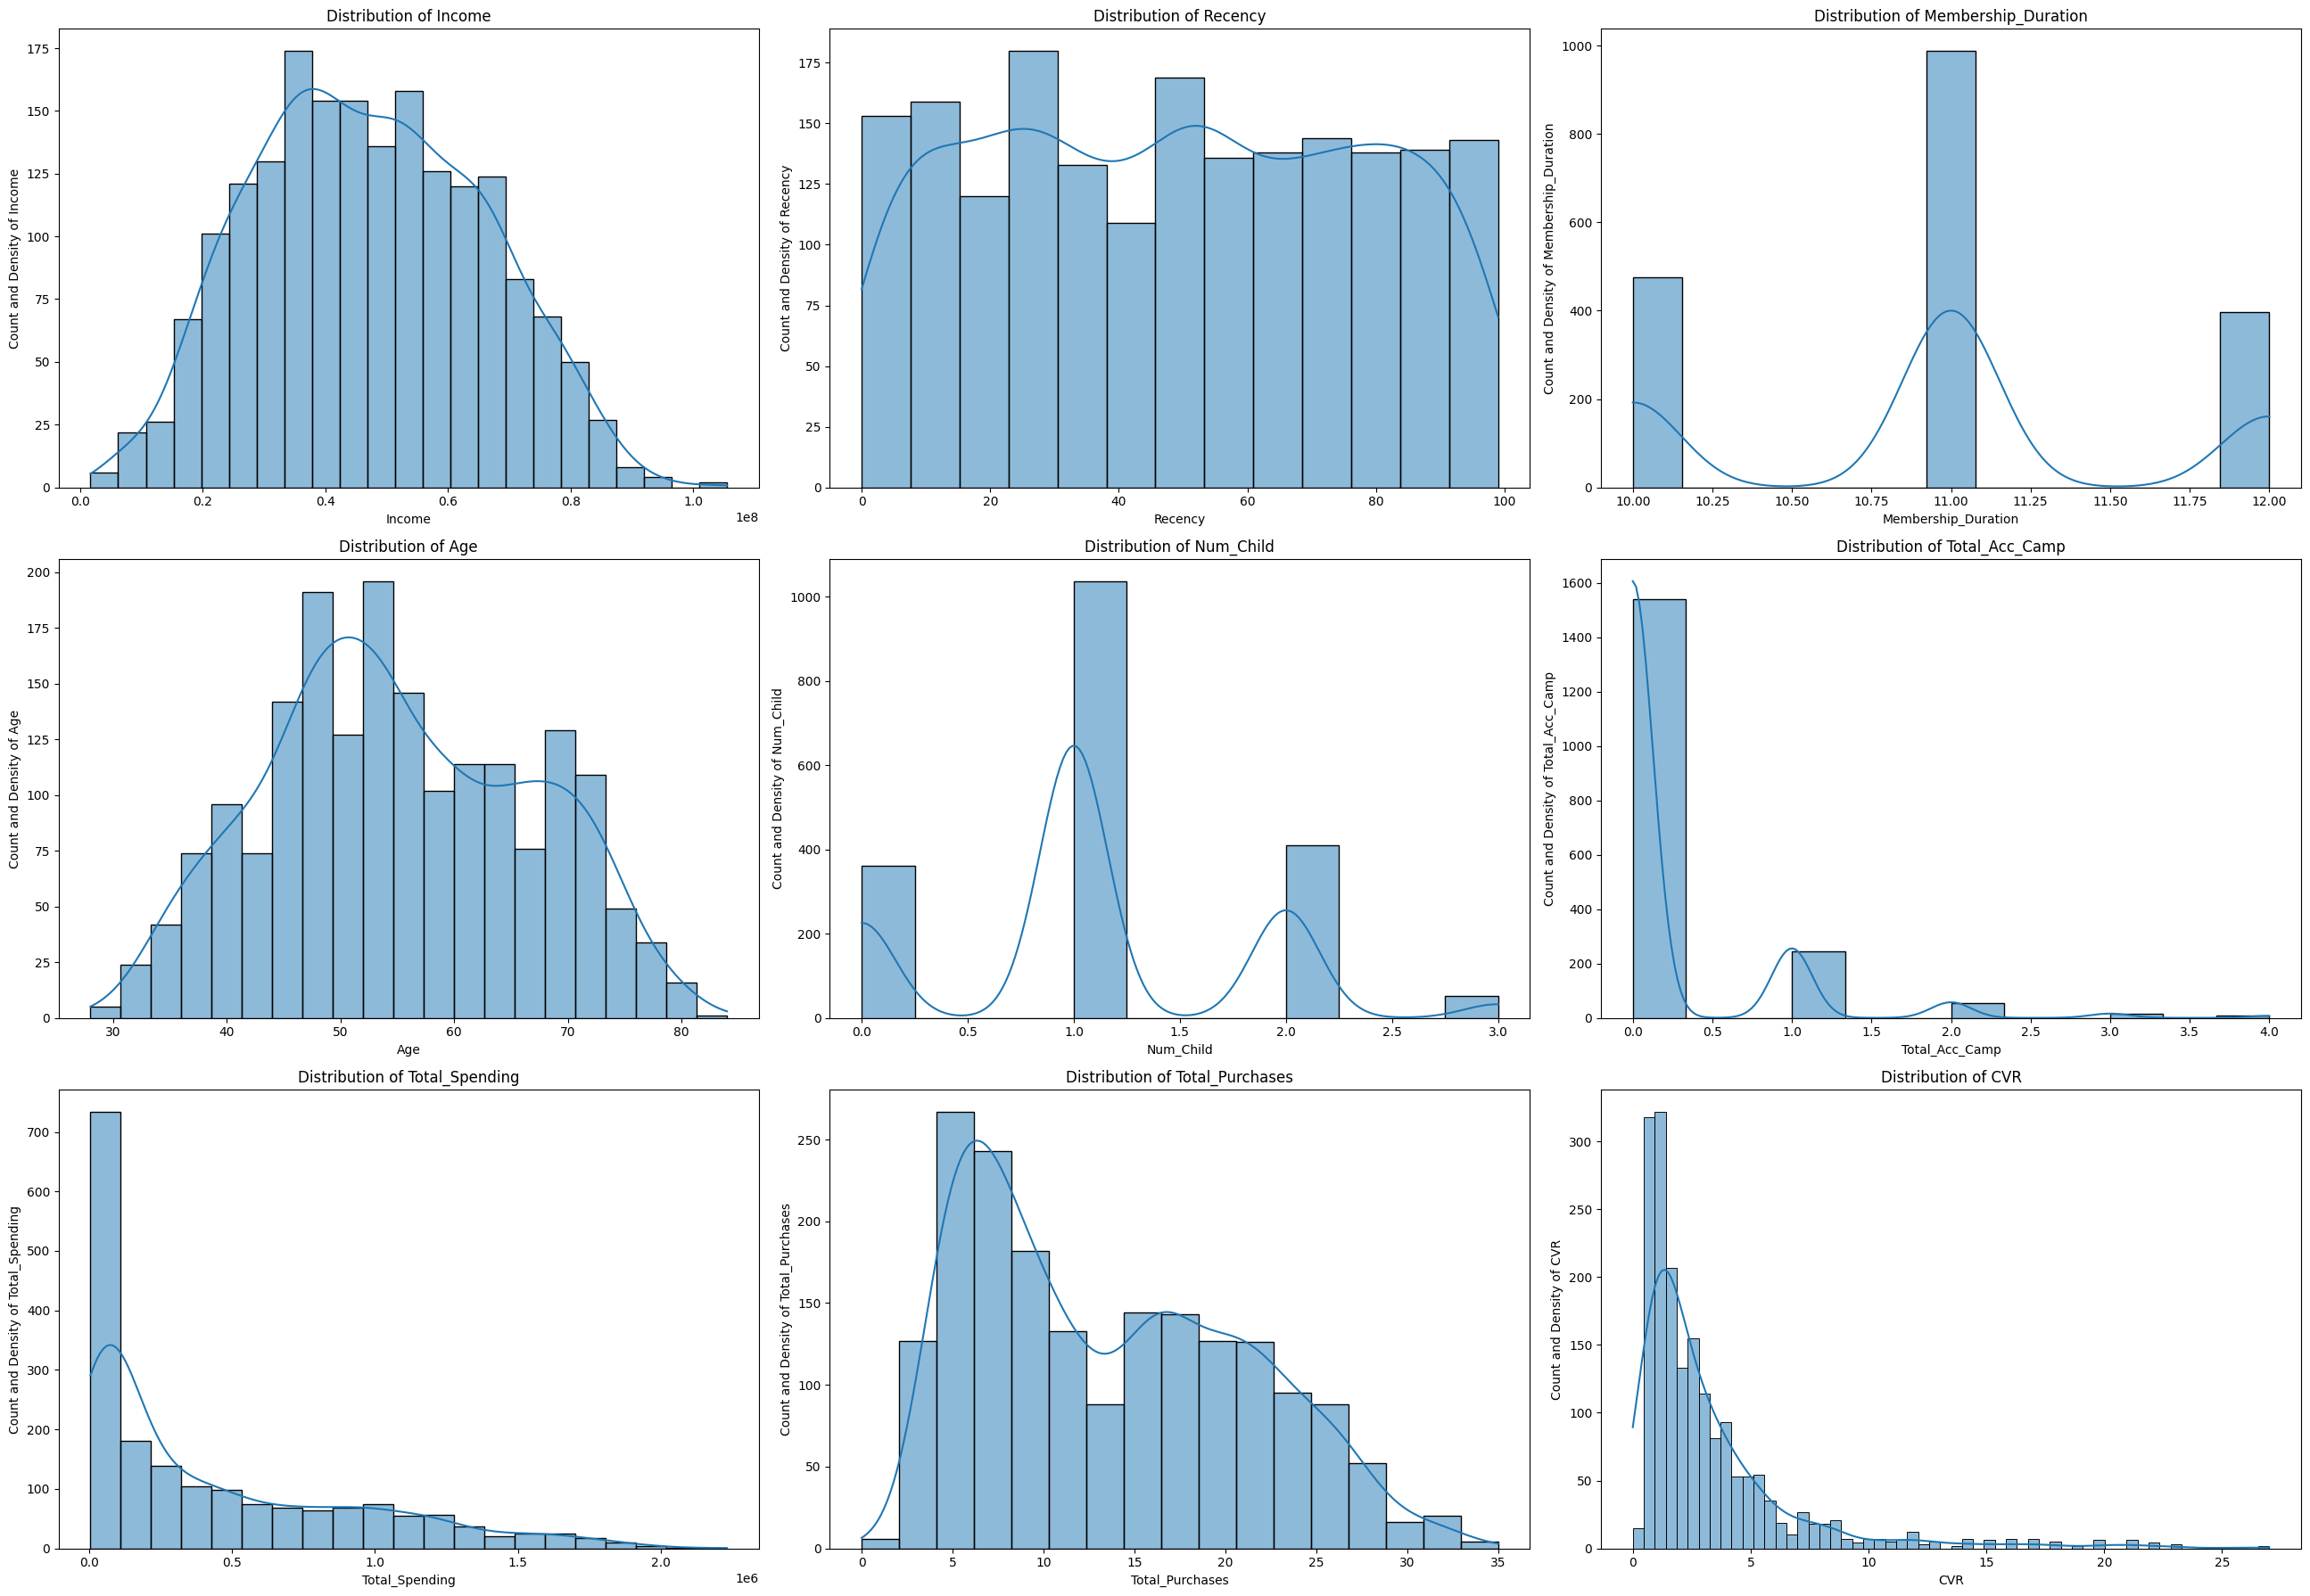

In [92]:
# Hisplot with kde 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))
ax = ax.flatten()

for i, col in enumerate(desc_cols):
    sns.histplot(data=df_filtered_outliers, ax=ax[i], x=col, kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

# Remove the last subplot if there are fewer features than subplots
if len(desc_cols) < len(ax):
    for j in range(len(desc_cols), len(ax)):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [55]:
from scipy.stats import skew, kurtosis
import pandas as pd

def identify_distribution_types(df, cols, uniform_cols=None, multimodal_cols=None):
    """
    Identifies and categorizes the distribution type of each numerical column in the DataFrame based on skewness and kurtosis.
    Allows manual specification of columns suspected to be uniform or bimodal/multimodal.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    cols (list of str): List of column names to analyze for distribution type.
    uniform_cols (list of str, optional): List of column names suspected to be uniform. Default is None.
    bimodal_cols (list of str, optional): List of column names suspected to be bimodal/multimodal. Default is None.

    Returns:
    pd.DataFrame: A DataFrame containing the columns' names, skewness values, kurtosis values, and identified distribution type.
    """
    # Initialize lists to store results
    skew_type_list = []
    skew_val_list = []
    kurtosis_val_list = []

    # Loop through each column to calculate distribution metrics
    for col in cols:
        data = df[col].dropna()  # Remove any NaN values

        # Calculate summary statistics
        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode()[0] if not data.mode().empty else median  # Handle case where mode is empty
        skew_val = round(skew(data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

        # Identify distribution type based on skewness and summary statistics
        if (mean == median == mode) or (-0.2 < skew_val < 0.2):
            skew_type = "Normal Distribution (Symmetric)"
        elif mean < median < mode:
            if skew_val <= -1:
                skew_type = "Highly Negatively Skewed"
            elif -0.5 >= skew_val > -1:
                skew_type = "Moderately Negatively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        else:
            if skew_val >= 1:
                skew_type = "Highly Positively Skewed"
            elif 0.5 <= skew_val < 1:
                skew_type = "Moderately Positively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        
        # Append the results to the lists
        skew_type_list.append(skew_type)
        skew_val_list.append(skew_val)
        kurtosis_val_list.append(kurtosis_val)
    
    # Create a DataFrame to store the results
    dist = pd.DataFrame({
        "Column Name": cols,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "Type of Distribution": skew_type_list
    })

    # Manually assign specific distributions based on user-provided column names
    if uniform_cols:
        dist.loc[dist['Column Name'].isin(uniform_cols), 'Type of Distribution'] = 'Uniform Distribution'
    if multimodal_cols:
        dist.loc[dist['Column Name'].isin(multimodal_cols), 'Type of Distribution'] = 'Multi-modal Distribution'

    return dist

# Example usage:
columns_to_check = desc_cols # List of columns to check distribution
uniform_columns = []  # List of uniform columns (special case)
multimodal_columns = ['Membership_Duration', 'Num_Child', 'Total_Acc_Camp']  # List of multi-modal columns (special case)

identify_distribution_types(df_filtered_outliers, columns_to_check, uniform_cols=uniform_columns, multimodal_cols=multimodal_columns)

Column Name  Skewness  Kurtosis  \
0               Income     0.127    -0.648   
1              Recency     0.018    -1.203   
2  Membership_Duration     0.053    -0.859   
3                  Age     0.110    -0.793   
4            Num_Child     0.324    -0.035   
5       Total_Acc_Camp     3.100    11.472   
6       Total_Spending     1.150     0.353   
7      Total_Purchases     0.468    -0.868   
8                  CVR     2.892    10.327   

                         Type of Distribution  
0             Normal Distribution (Symmetric)  
1             Normal Distribution (Symmetric)  
2                    Multi-modal Distribution  
3             Normal Distribution (Symmetric)  
4                    Multi-modal Distribution  
5                    Multi-modal Distribution  
6                    Highly Positively Skewed  
7  Moderately Normal Distribution (Symmetric)  
8                    Highly Positively Skewed

Distribution types of each column can be seen in above dataframe. This align with the previous statistical summary and will give us information about further data processing process (mainly feature scalling) later.

### Categorical Columns

In [56]:
len(df_filtered_outliers[cats_cols].columns)

10

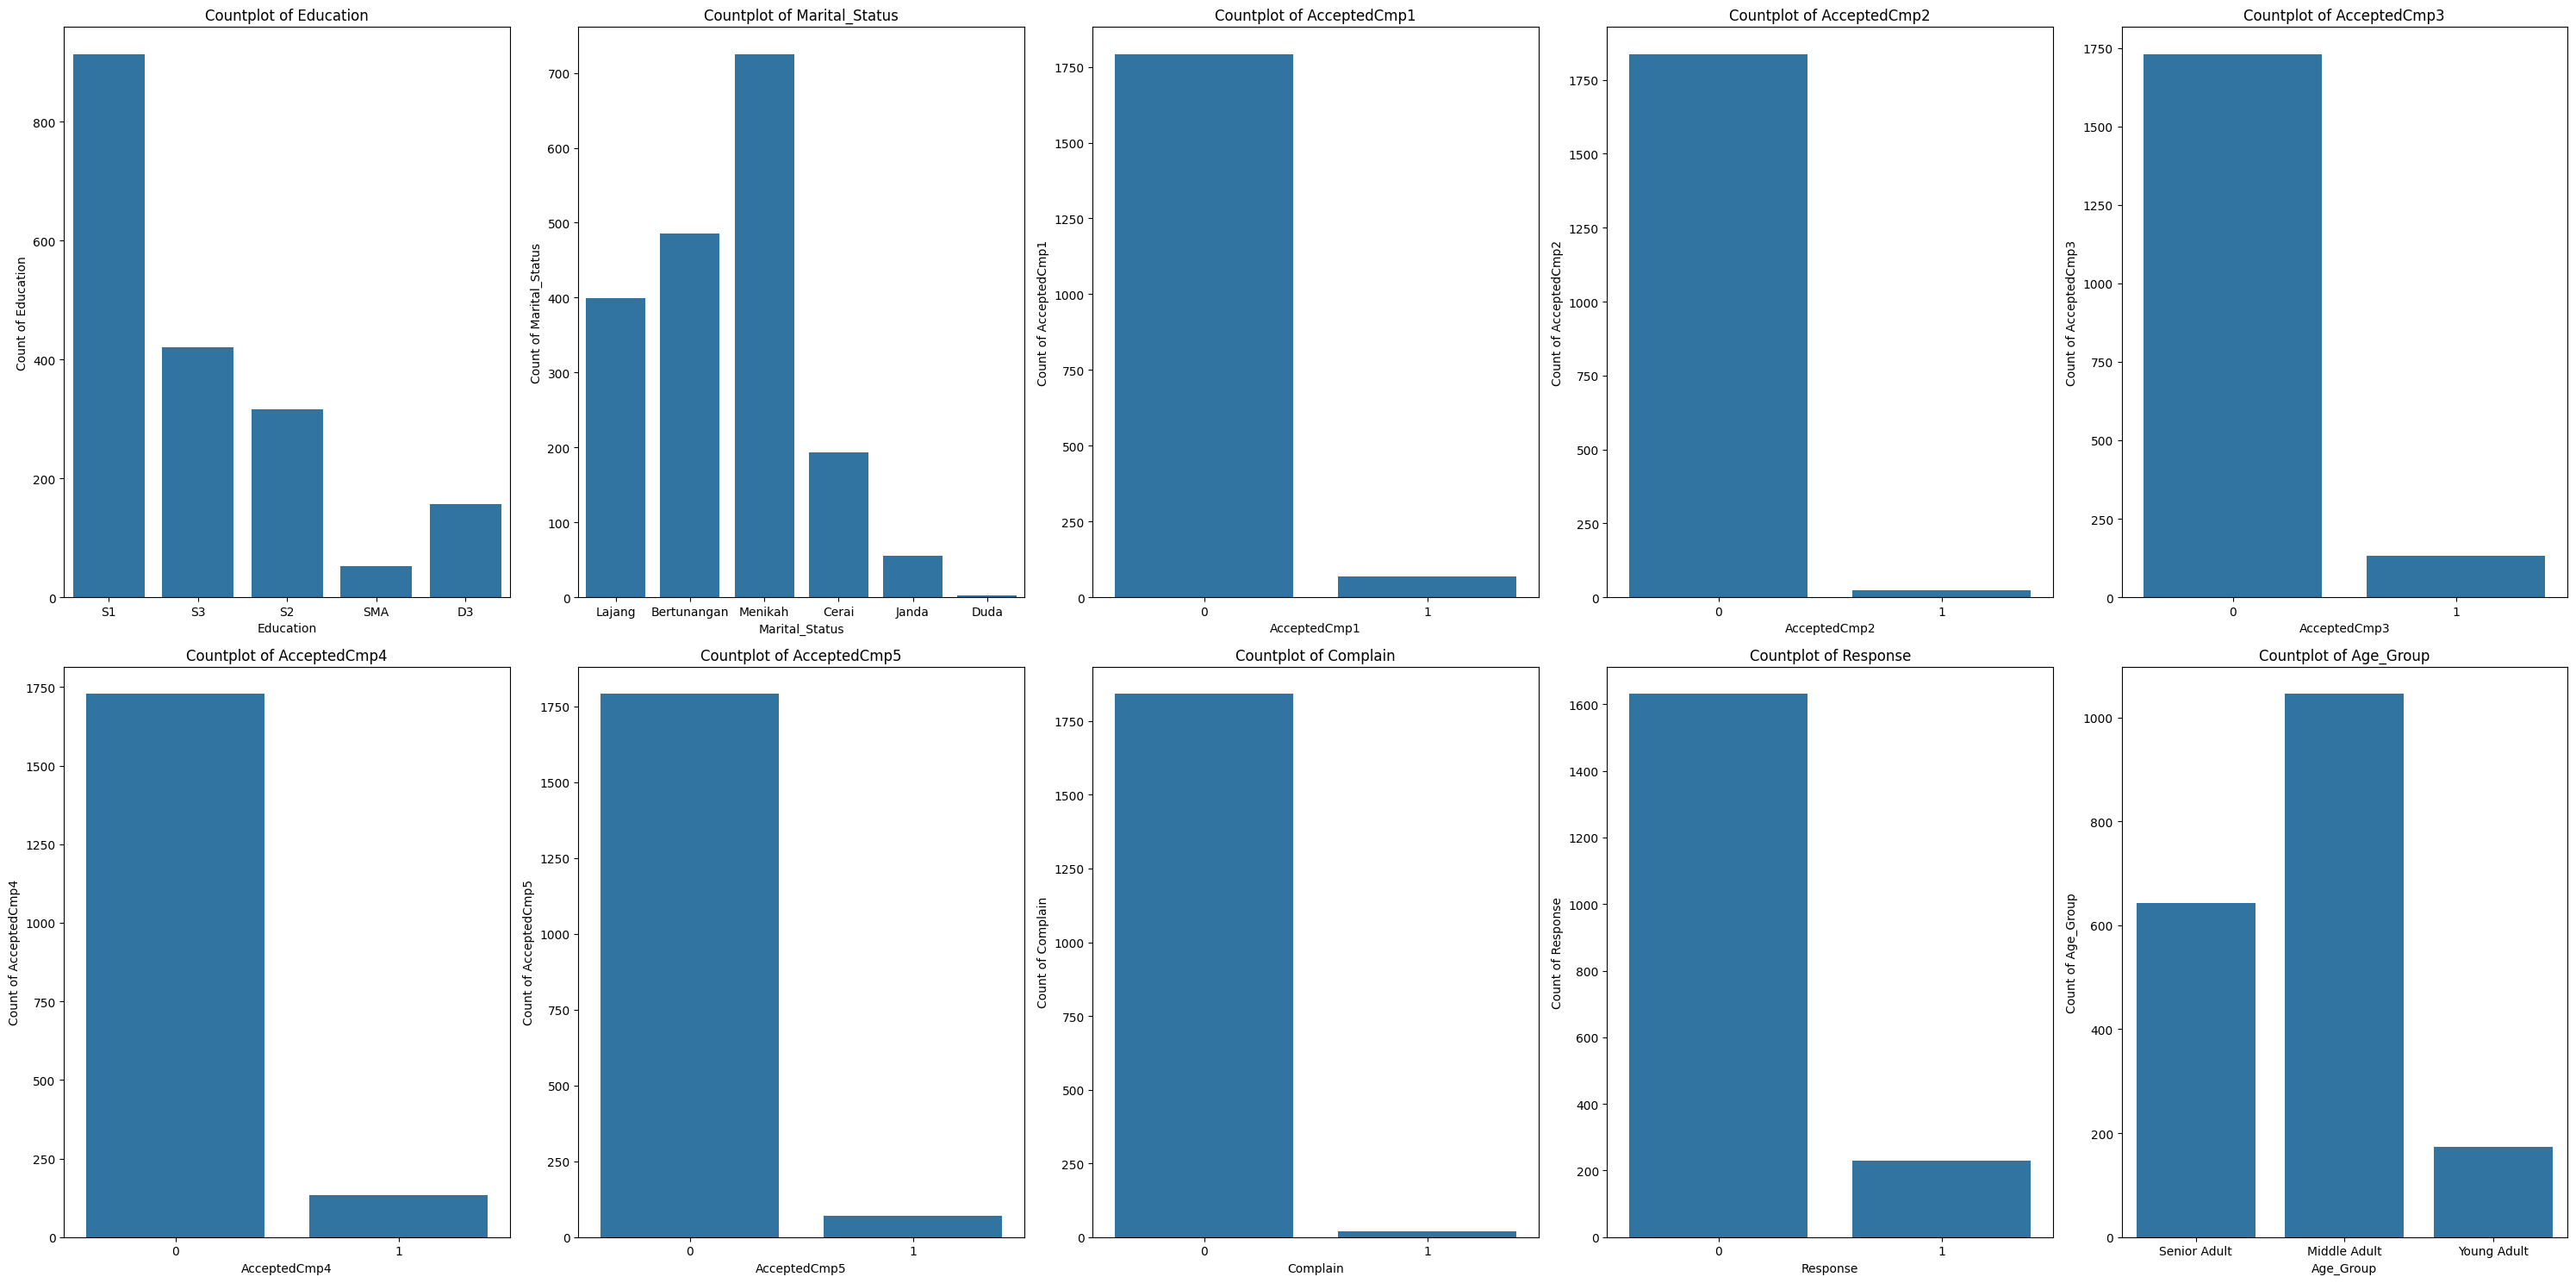

In [93]:
# Countplot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
ax = ax.flatten()

cats_cols_excluding_id = [col for col in cats_cols if col != 'ID']
cats_cols_excluding_id.extend(new_cats_cols)

for i, col in enumerate(cats_cols_excluding_id) :
    sns.countplot(data=df_filtered_outliers, ax=ax[i], x=col)
    ax[i].set_title(f'Countplot of {col}')
    ax[i].set_ylabel(f'Count of {col}')
    ax[i].set_xlabel(f'{col}')

# Remove the last subplot if there are fewer features than subplots
if len(cats_cols_excluding_id) < len(ax):
    for j in range(len(cats_cols_excluding_id), len(ax)):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

**Major Findings :**

- The majority of customers have at least a Bachelor's degree.
- The majority of customers are married.
- The majority of customers do not file complaints.
- The majority of customers do not respond to the campaign.
- The majority of customers are middle adults (age 40-60).

## Bivariate Analysis

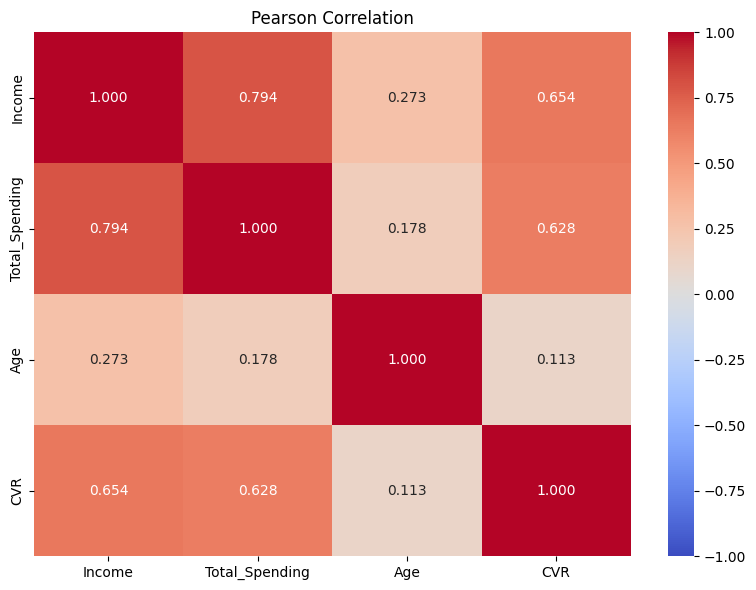

In [76]:
# Correlation heatmap of numerical features and target
included_col = ['Income', 'Total_Spending', 'Age', 'CVR']
# cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
plt.figure(figsize=(8,6))
sns.heatmap(data=df_filtered_outliers[included_col].corr(), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()

**Major Findings :**

- Most of the features have positive correlation to each other.
- `Income` and `Total_Spending` have high/strong positive correlation to `CVR` while `Age` have low/weak positive correlation to `CVR`.

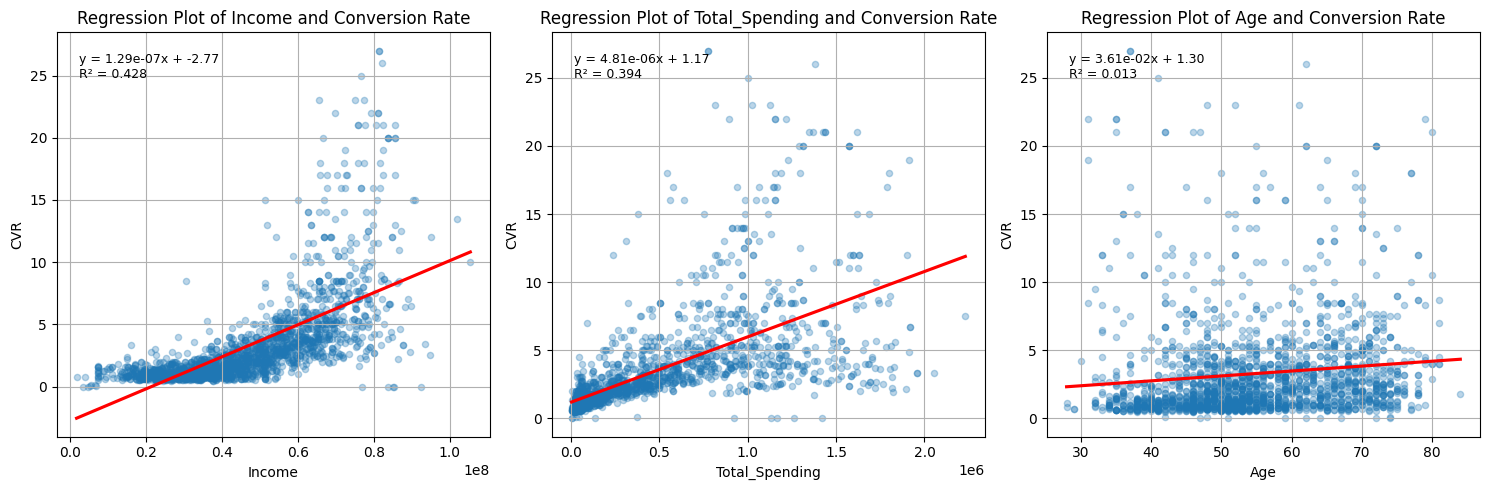

In [78]:
# Regplot of CVR vs Income, Total Spending, and Age
from scipy import stats

included_col = ['Income', 'Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Create regplot
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=col, y='CVR', 
                scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'red'}, 
                ci=False)
    
    # Calculate regression parameters
    x = df_filtered_outliers[col]
    y = df_filtered_outliers['CVR']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2
    
    # Add equation and R² text
    equation = f'y = {slope:.2e}x + {intercept:.2f}'  # Using scientific notation for small coefficients
    r2_text = f'R² = {r_squared:.3f}'
    
    # Add text to plot
    ax[i].text(0.05, 0.95, equation + '\n' + r2_text, 
               transform=ax[i].transAxes,
               fontsize=9,
               verticalalignment='top')
    
    ax[i].set_title(f'Regression Plot of {col} and Conversion Rate')
    ax[i].grid(True)

plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Overall, income and total spending have a positive correlation with purchase conversion rate (CVR).
    - This means that the higher the income and total spending, the higher the likelihood of conversion or purchase from potential consumers.
    - This positive correlation may be caused by several factors, such as better financial ability to meet the needs or desires of customers, as well as a high perceived value of the products or services offered. Therefore, companies can pay attention to and optimize their marketing strategies by considering target audiences with higher incomes and total spending, thereby increasing conversion opportunities and the overall success of marketing campaigns.

- Meanwhile, age features tend to have a non-significant correlation with the conversion rate. This means that age is not a dominant factor influencing consumer decisions to convert or make purchases.

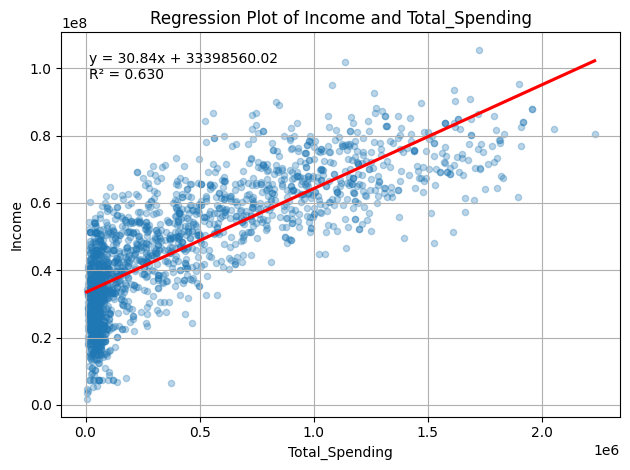

In [79]:
# Regplot of Income vs Total Spending

# Create the plot
sns.regplot(data=df_filtered_outliers, x='Total_Spending', y='Income', 
            scatter_kws={'s':20, 'alpha':0.3}, 
            line_kws={'color':'red'}, 
            ci=False)

# Calculate the line equation and R²
x = df_filtered_outliers['Total_Spending']
y = df_filtered_outliers['Income']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# Add text with equation and R² to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r2_text = f'R² = {r_squared:.3f}'

# Position the text in the upper left corner
plt.text(0.05, 0.95, equation + '\n' + r2_text, 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top')

plt.title('Regression Plot of Income and Total_Spending')
plt.grid(True)
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Income and total spending have a strong positive correlation.
- This indicates a significant relationship between an individual's income level and their spending patterns. The higher someone's income, the more likely they are to have higher spending.

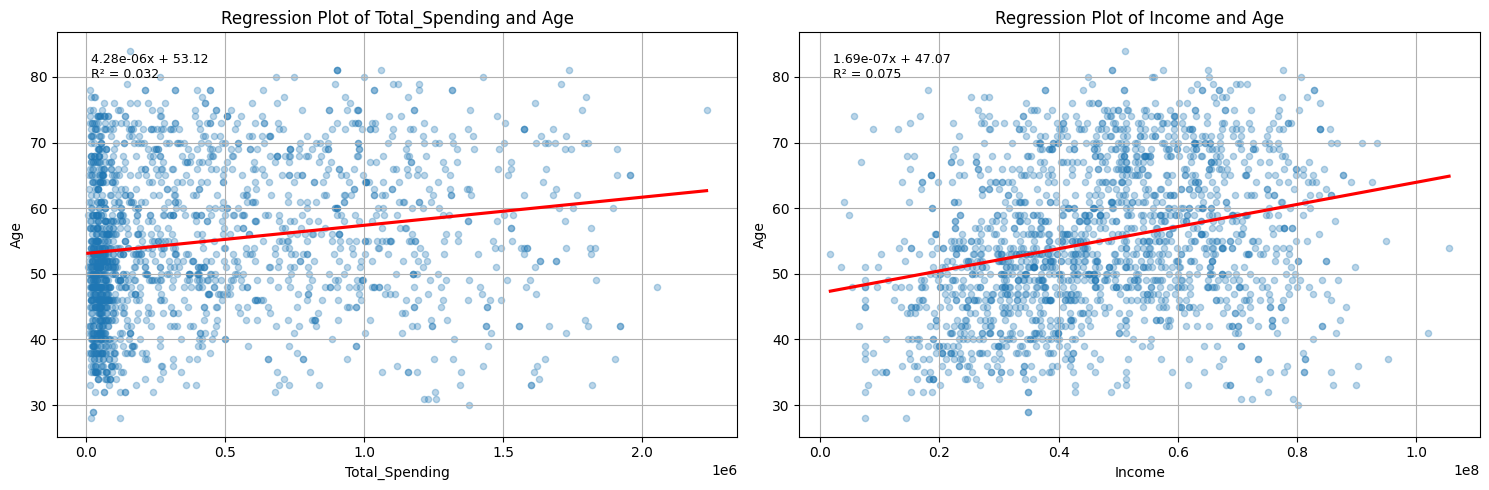

In [80]:
# Regplot of Age vs Total Spending and Income
included_col = ['Total_Spending', 'Income']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Create regplot
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=col, y='Age',
                scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'red'},
                ci=False)
    
    # Calculate regression parameters
    x = df_filtered_outliers[col]
    y = df_filtered_outliers['Age']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2

    # Add equation and R² text
    equation = f'{slope:.2e}x + {intercept:.2f}'
    r2_text = f'R² = {r_squared:.3f}'

    # Add text to plot
    ax[i].text(0.05, 0.95, equation + '\n' + r2_text,
               transform=ax[i].transAxes,
               fontsize=9,
               verticalalignment='top')    
    
    ax[i].set_title(f'Regression Plot of {col} and Age')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Age has a weak positive correlation and even lacks significant correlation with the income (Income) or total spending features.
- This means that age does not directly influence an individual's income level or spending patterns. However, companies still need to consider age as part of their marketing strategy. Although the weak correlation suggests that age may not be a primary determinant factor in consumer decisions.

## Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

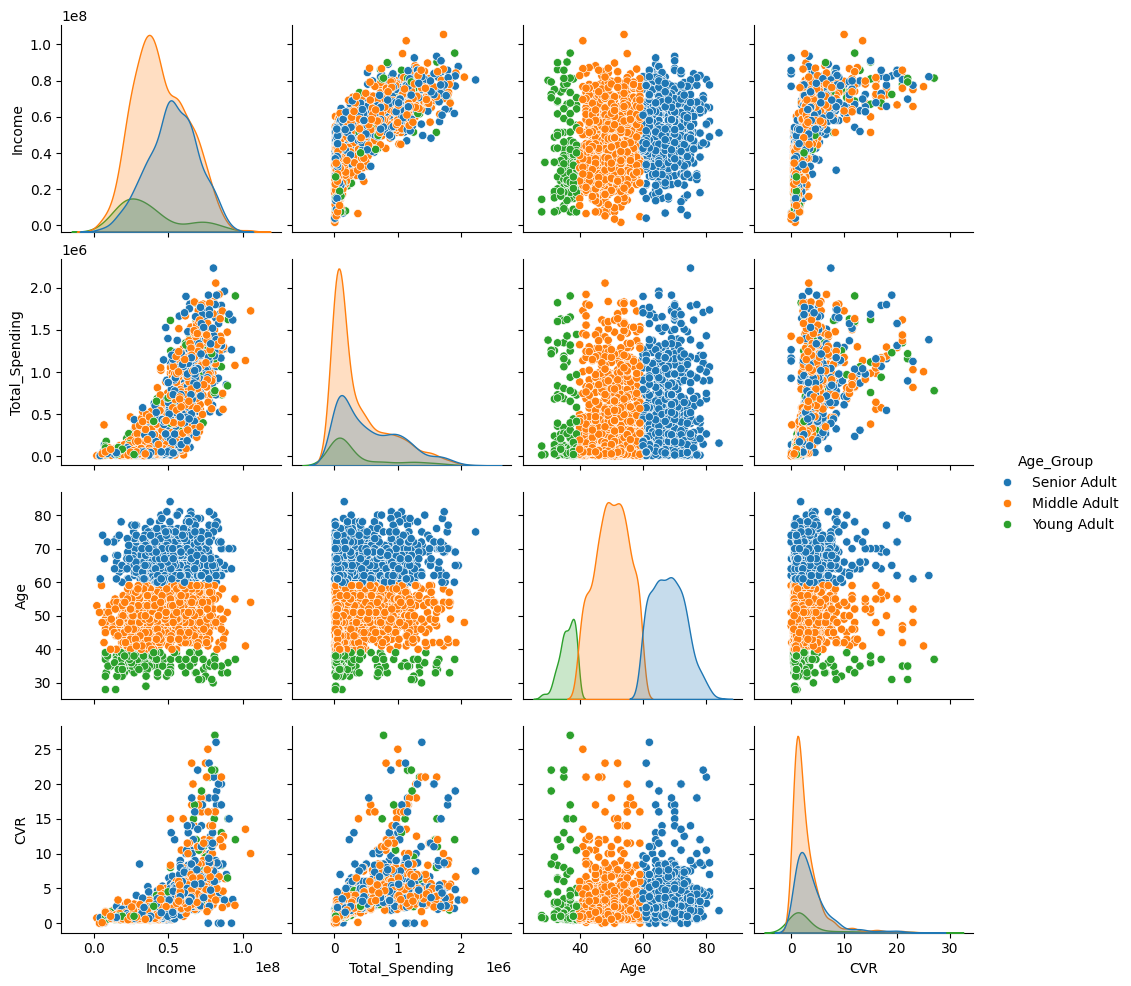

In [82]:
# Pairplot with hue Age Group
plt.figure(figsize=(15,15))

included_col = ['Income', 'Total_Spending', 'Age', 'CVR', 'Age_Group']

sns.pairplot(data=df_filtered_outliers[included_col], hue='Age_Group', diag_kind='kde')
plt.show()

There aren't any interesting insights or significant patterns from the separation of Age Group between Income, Total Spending, and CVR. This further indicates that age may not be the dominant factor influencing the relationship between Income, Total Spending, and the conversion rate (CVR).

### Additional Analysis (Outside of the focused task 1 columns)

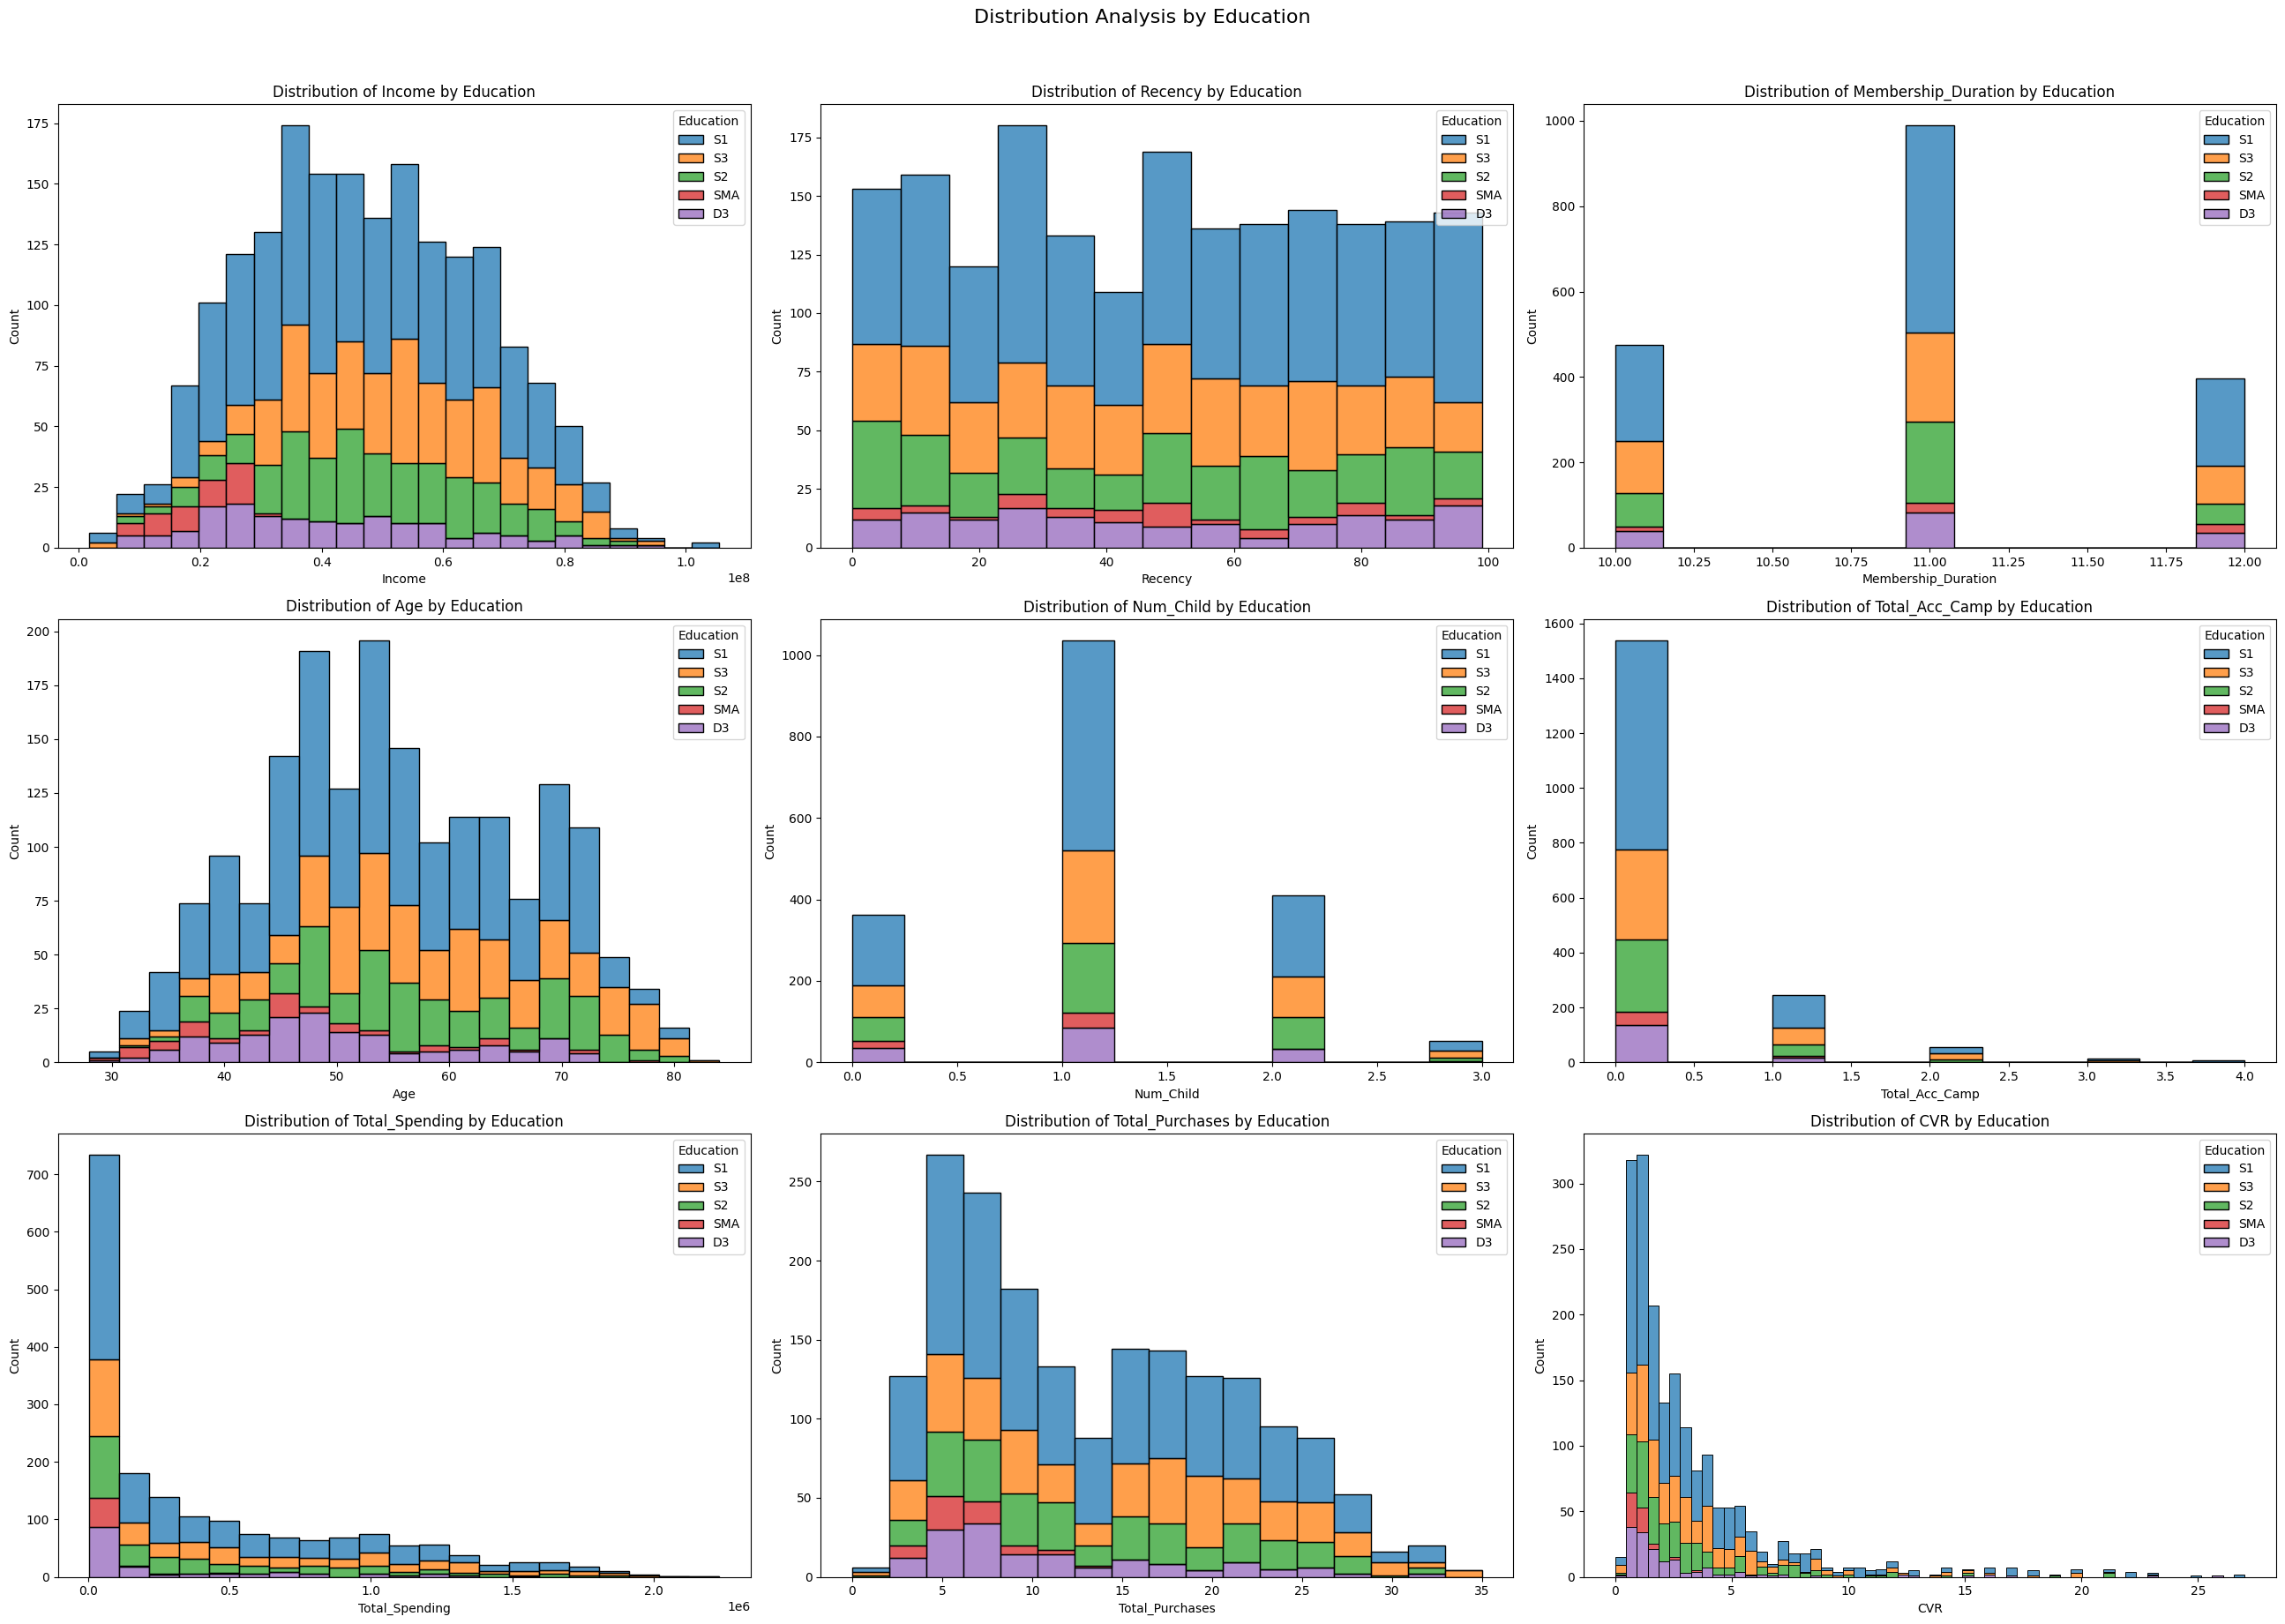

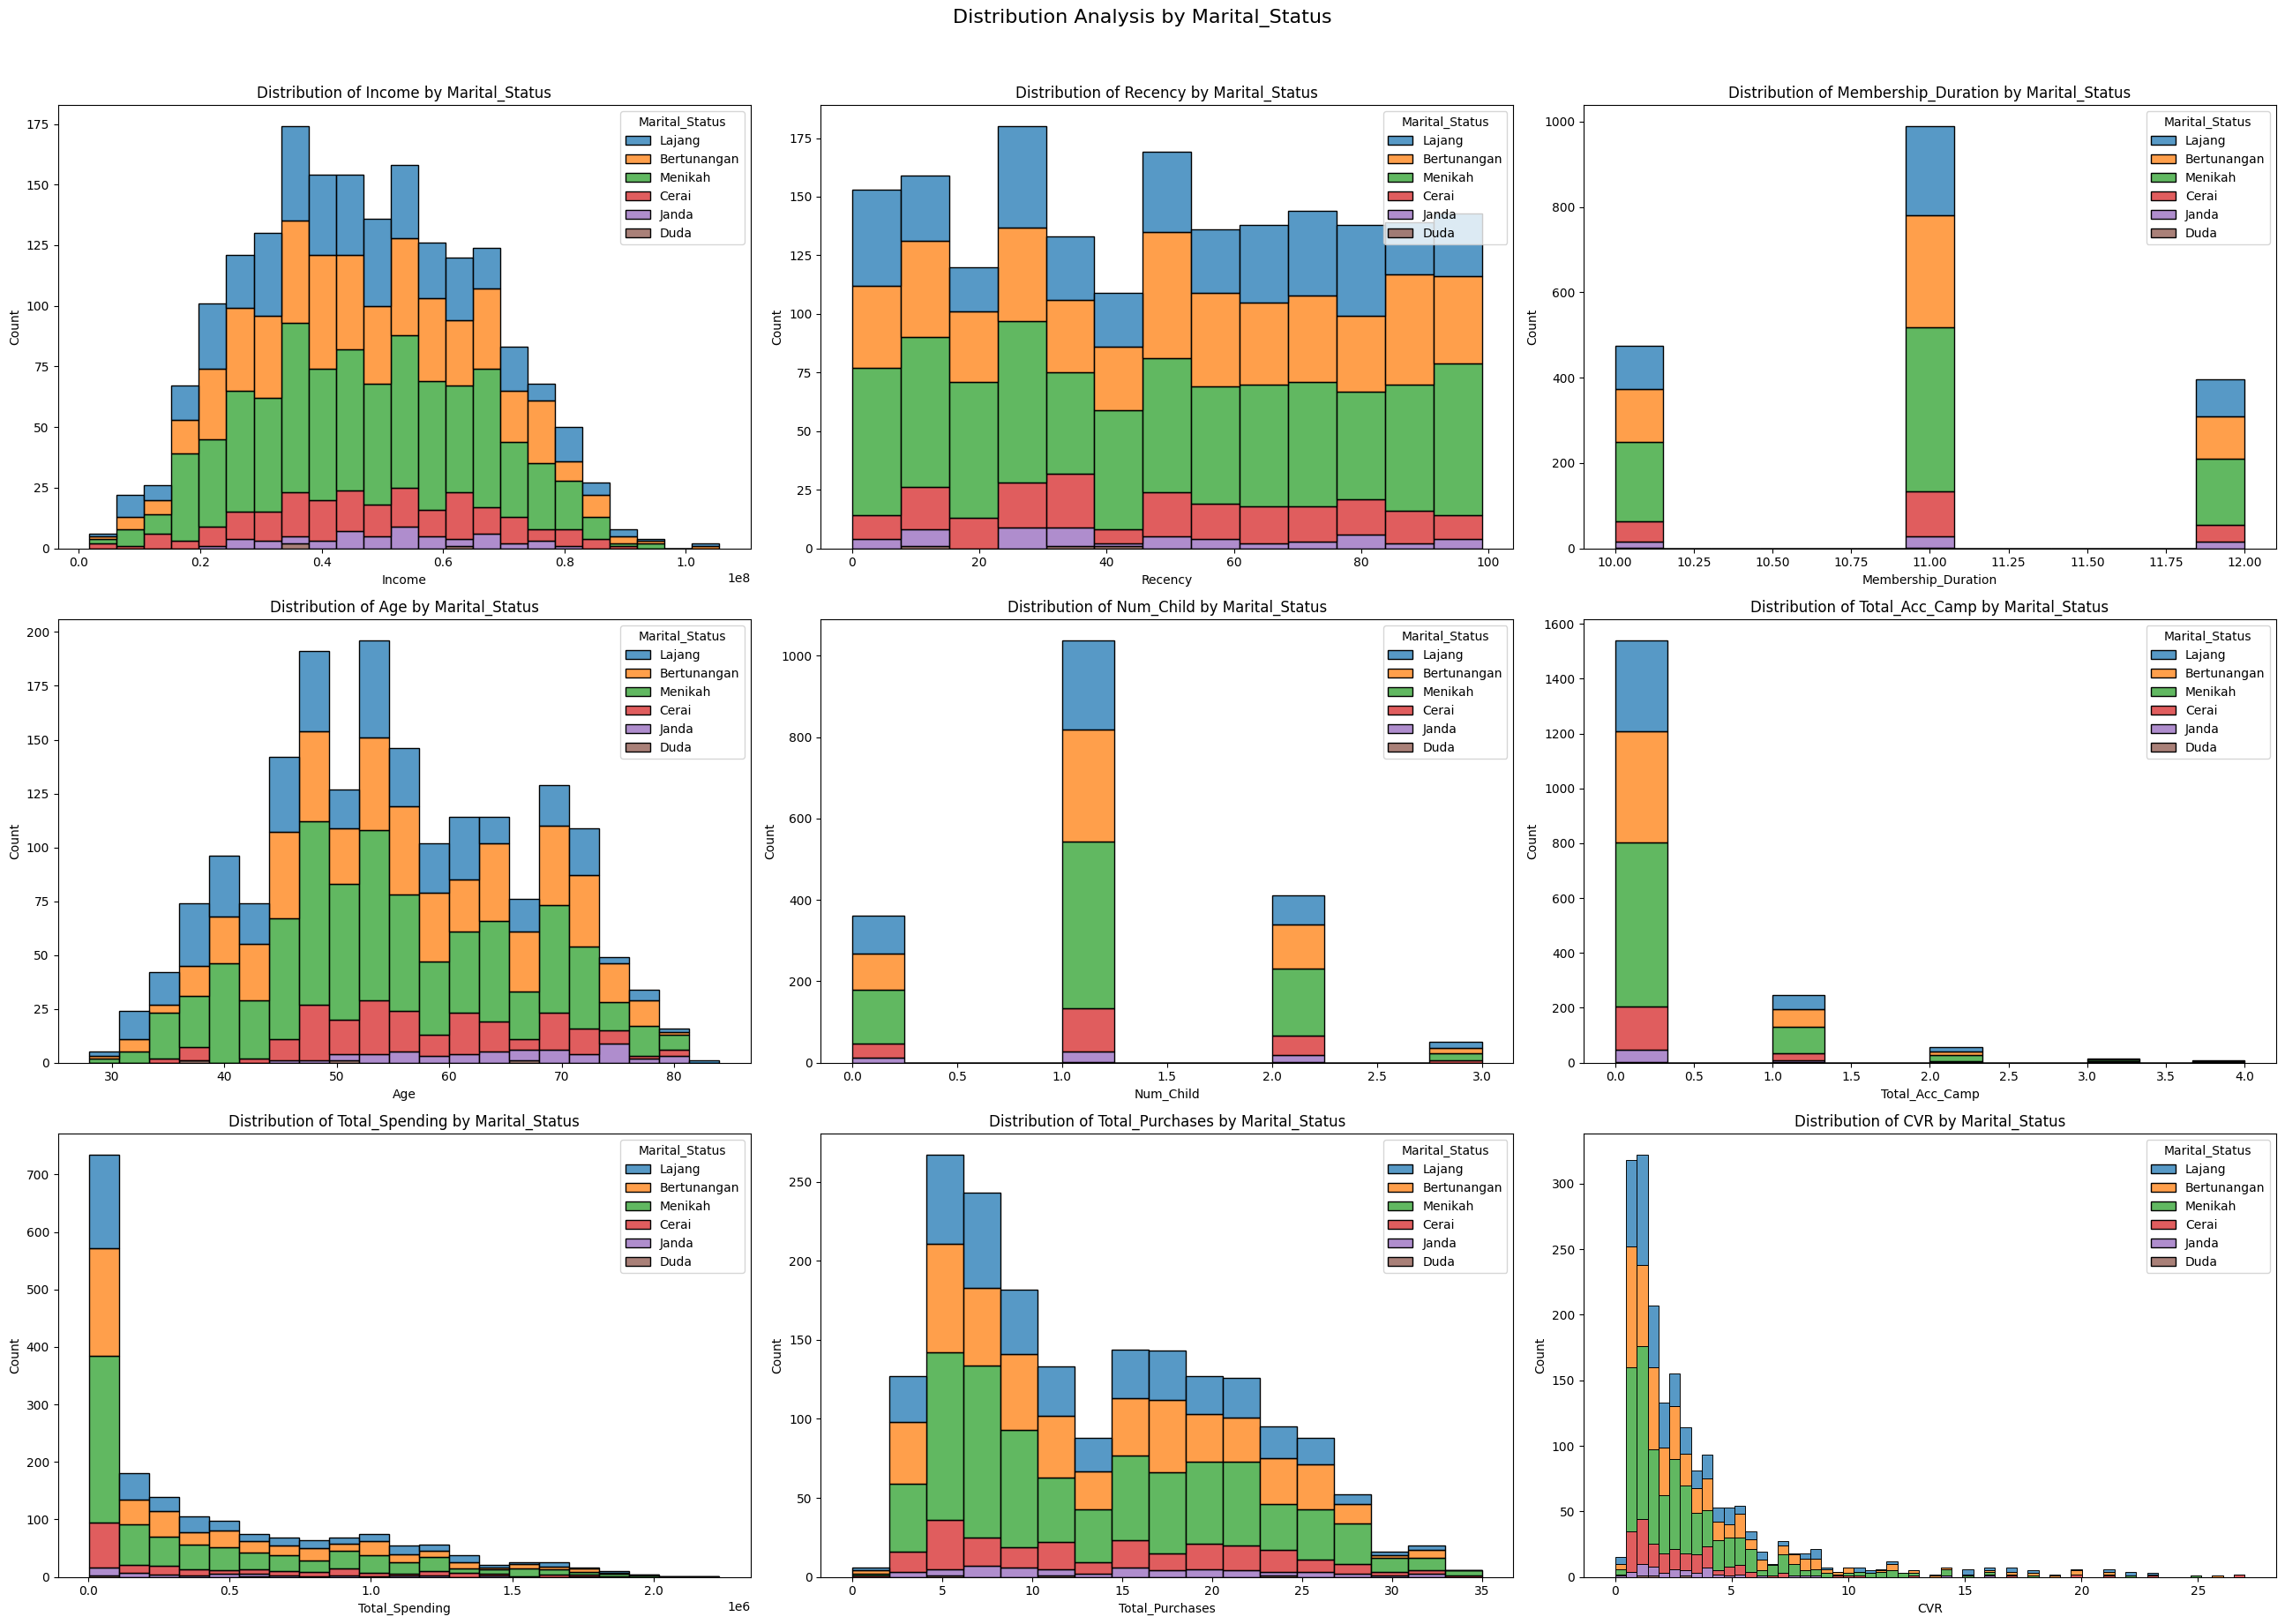

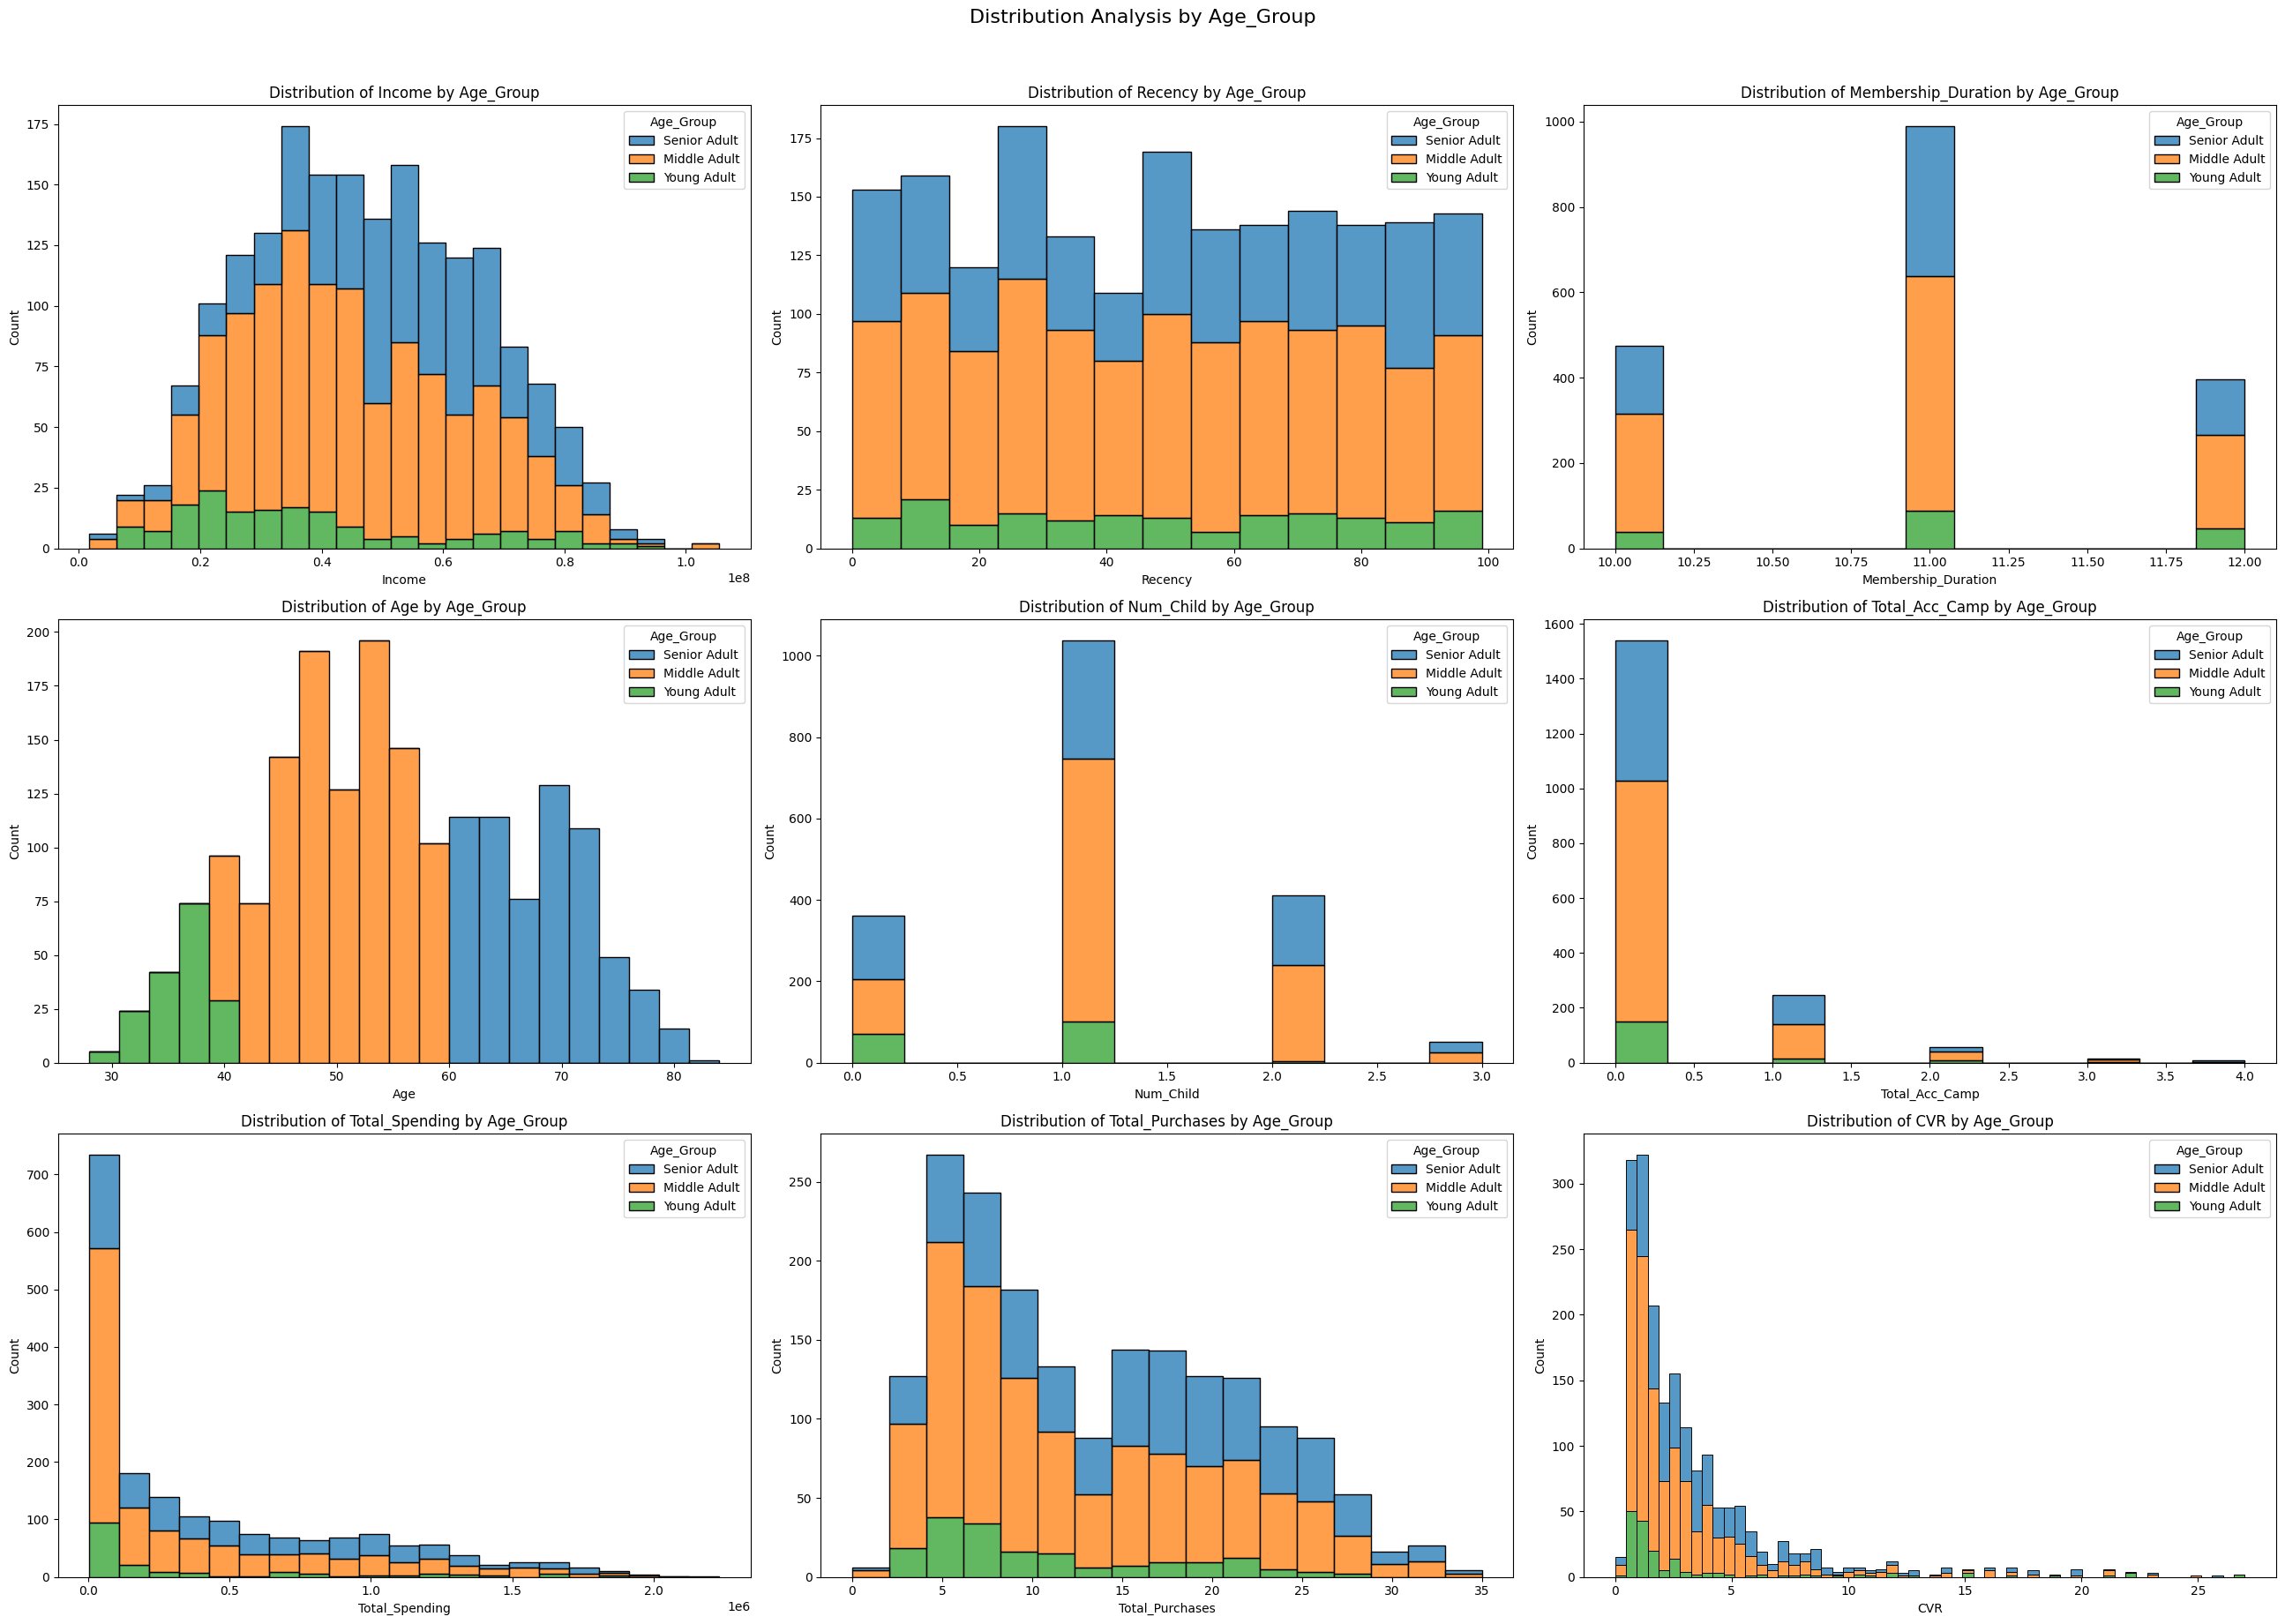

In [95]:
# Hisplot with kde for each categorical variable
categorical_vars = ['Education', 'Marital_Status', 'Age_Group']

for cat_var in categorical_vars:
    # Create a figure for each categorical variable
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))
    ax = ax.flatten()
    
    # Plot histograms for each numerical column
    for i, col in enumerate(desc_cols):
        sns.histplot(data=df_filtered_outliers, ax=ax[i], 
                     x=col,
                     hue=cat_var,
                     multiple="stack")
        ax[i].set_title(f'Distribution of {col} by {cat_var}')
        ax[i].set_ylabel(f'Count')
        ax[i].set_xlabel(f'{col}')
    
    # Remove the last subplot if there are fewer features than subplots
    if len(desc_cols) < len(ax):
        for j in range(len(desc_cols), len(ax)):
            fig.delaxes(ax[j])
    
    plt.suptitle(f'Distribution Analysis by {cat_var}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# **Task 2 : Further Data Pre-Processing**

In [57]:
df_preprocessed = df_filtered_outliers.copy()
df_preprocessed

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

## Feature Encoding

In [58]:
encoded_features = ['Education', 'Marital_Status', 'Age_Group']

for col in encoded_features :
    print(col)
    print(df_preprocessed[col].unique())
    print()

Education
['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status
['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

Age_Group
['Senior Adult' 'Middle Adult' 'Young Adult']



In [59]:
# Before encoding
df_preprocessed[['Education', 'Age_Group', 'Marital_Status']].head()

Education     Age_Group Marital_Status
1        S1  Senior Adult         Lajang
2        S1  Middle Adult    Bertunangan
3        S1  Middle Adult    Bertunangan
4        S3  Middle Adult        Menikah
5        S2  Middle Adult    Bertunangan

In [60]:
# Label encoding for Education and Age_Group
df_preprocessed['Education'] = df_preprocessed['Education'].replace({'SMA' : 0,
                                                                    'D3' : 1,
                                                                    'S1' : 2,
                                                                    'S2' : 3,
                                                                    'S3' : 4})


df_preprocessed['Age_Group'] = df_preprocessed['Age_Group'].replace({'Young Adult' : 0,
                                                                    'Middle Adult' : 1,
                                                                    'Senior Adult' : 2})

In [61]:
# One-hot encoding for Marital_Status
onehots = pd.get_dummies(df_preprocessed['Marital_Status'], prefix='Marital_Status')
onehots = onehots.astype(int)
df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

In [62]:
# After encoding
df_preprocessed[['Education', 'Age_Group', 'Marital_Status_Bertunangan', 'Marital_Status_Cerai',
                'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah']].head()

Education  Age_Group  Marital_Status_Bertunangan  Marital_Status_Cerai  \
1          2          2                           0                     0   
2          2          1                           1                     0   
3          2          1                           1                     0   
4          4          1                           0                     0   
5          3          1                           1                     0   

   Marital_Status_Duda  Marital_Status_Janda  Marital_Status_Lajang  \
1                    0                     0                      1   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   
5                    0                     0                      0   

   Marital_Status_Menikah  
1                       0  
2                       0  
3                       0  
4                       1  
5                       0

Now we would need to drop some unnecessary/unrelated columns before building our model, features that will be drop are :
> `ID`, `Year_Birth`, `Marital_Status`, `Dt_Customer`

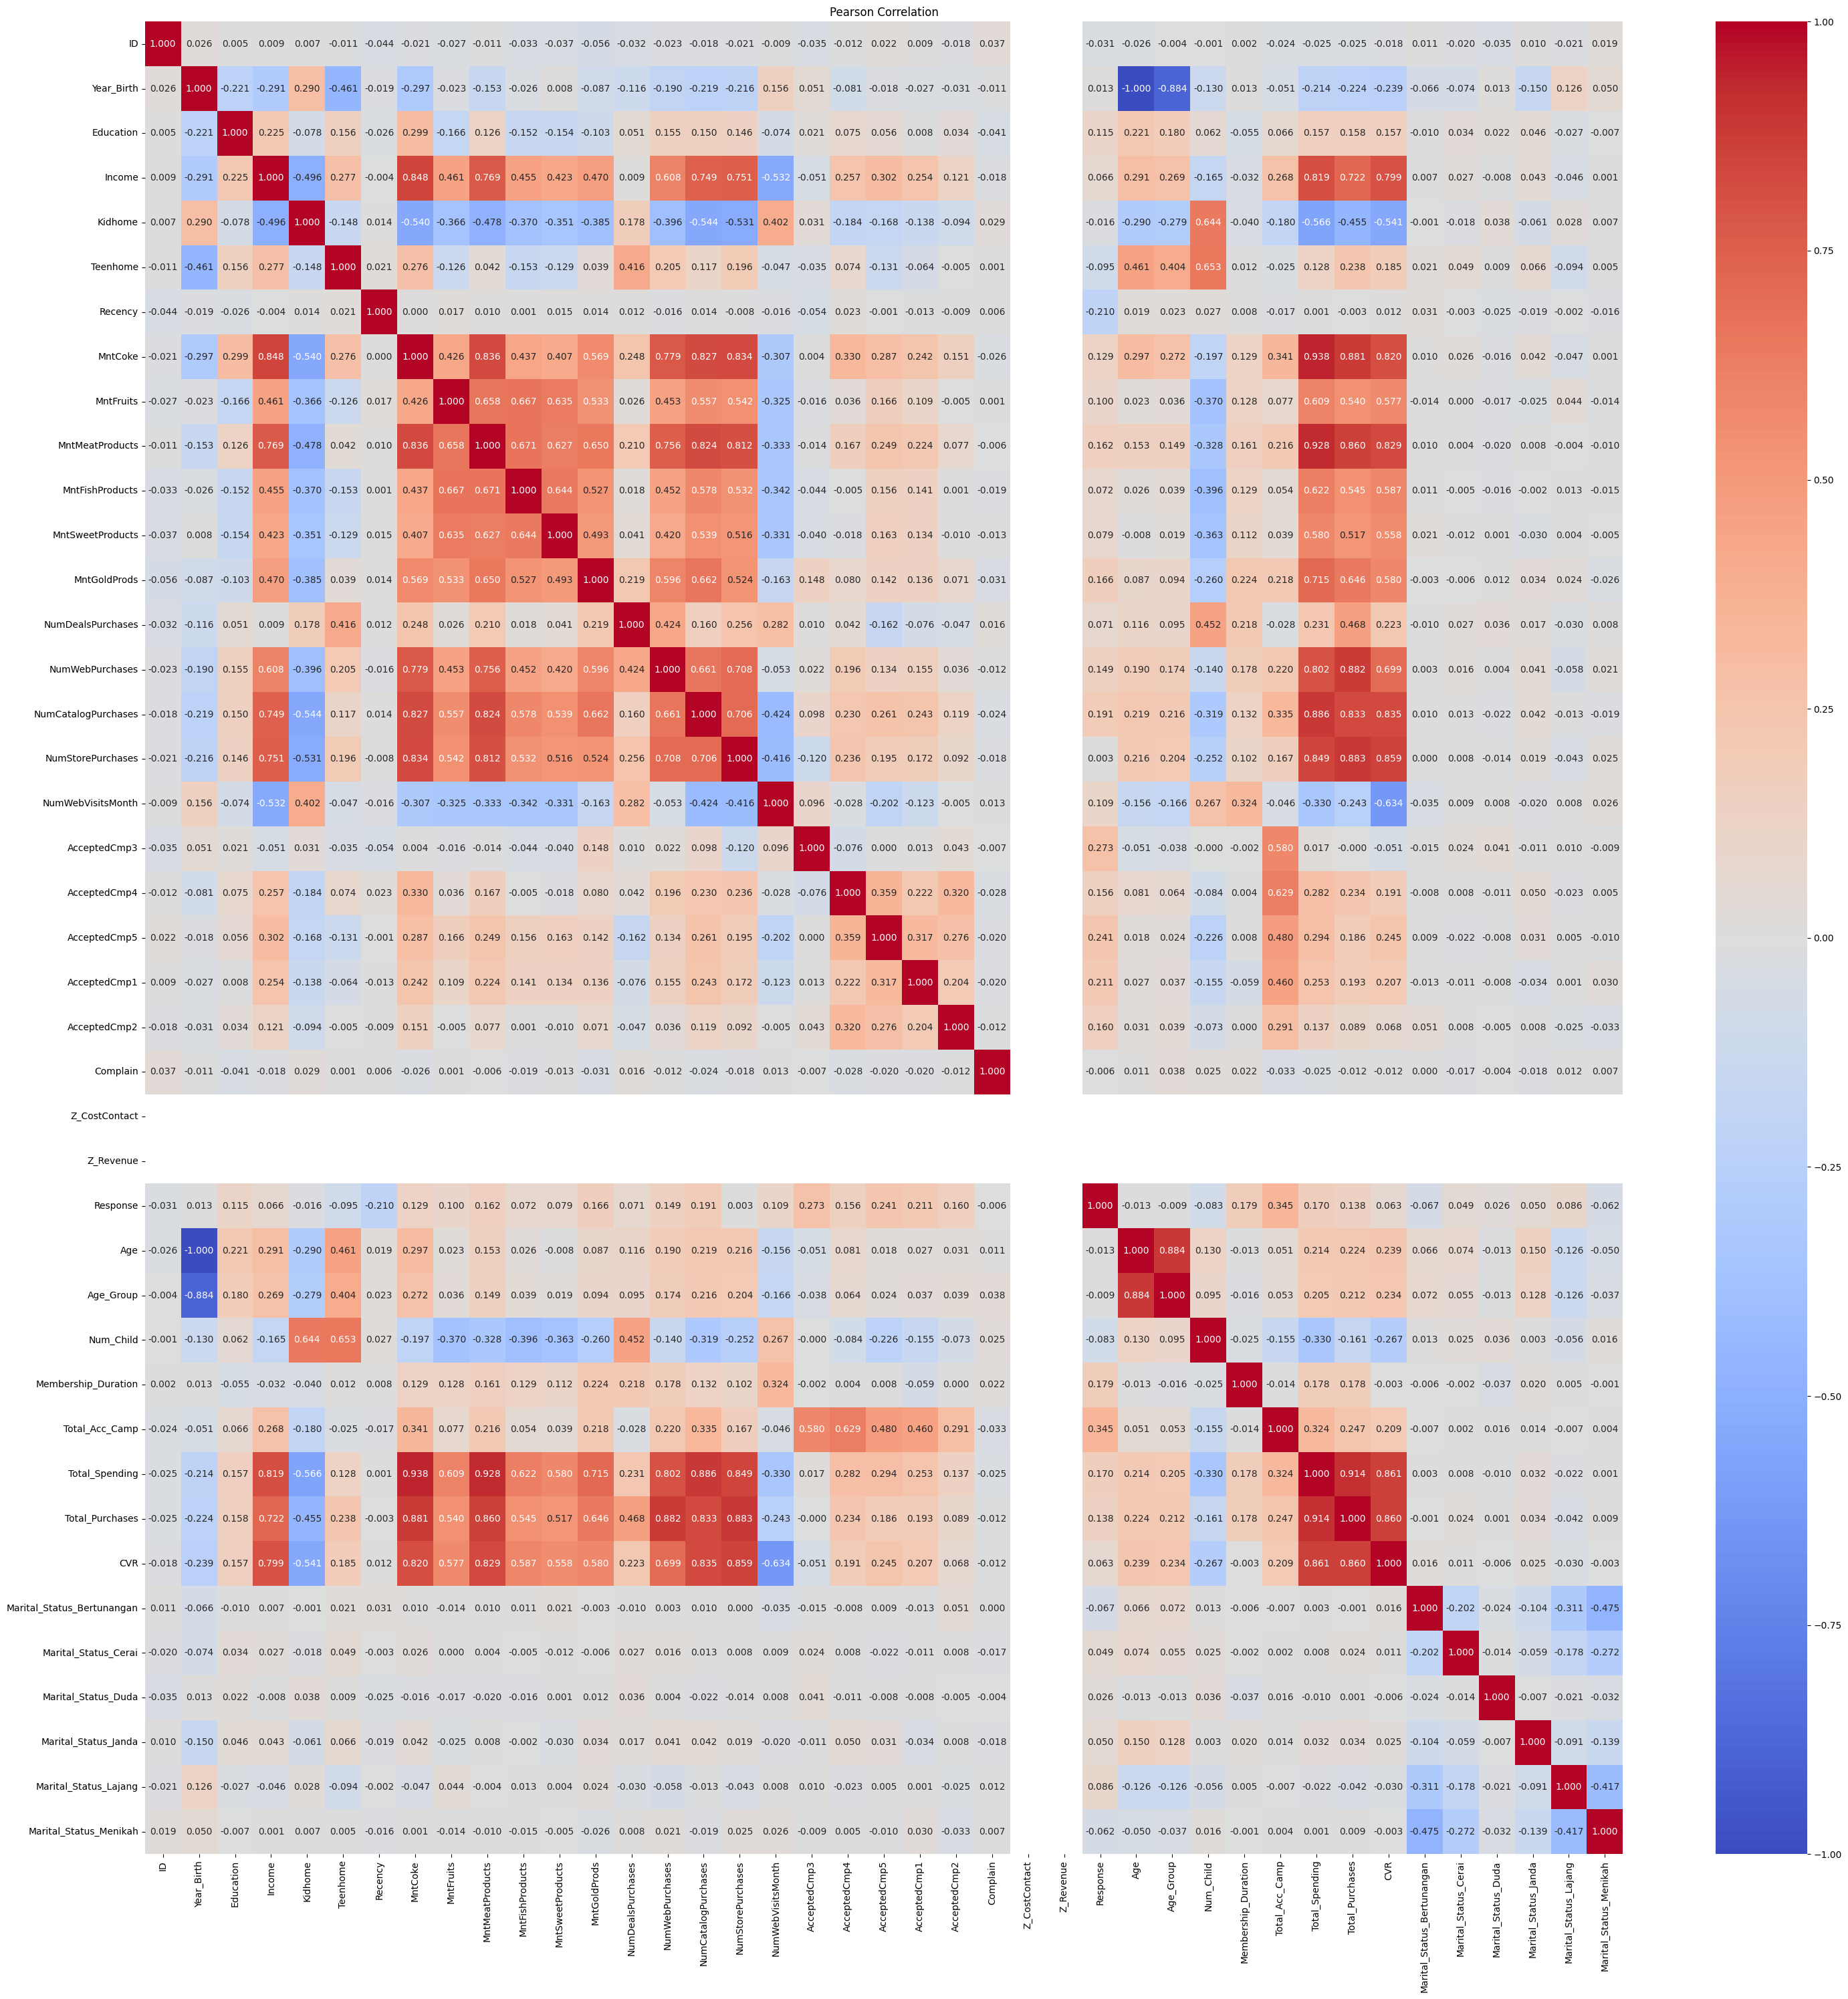

In [63]:
# Correlation heatmap of numerical features and target

# Plot correlation heatmap with Spearmann method
plt.figure(figsize=(30,30))
sns.heatmap(data=df_preprocessed.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()

In [64]:
# Drop unnecessary columns
df_preprocessed.drop(columns=['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer'], inplace=True)

In [65]:
# Check if all features are all in numeric
pd.DataFrame(df_preprocessed.dtypes, columns=['Data Types'])

Data Types
Education                       int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
Age                             int64
Age_Group                       int64
Num_Child                       int64
Membership_Duration             int32
Total_Acc_Camp                  int64
Total_Spending                  int64
Total_Purchases                 int64
CVR                           float64
Marital_Status_Bertunangan      int32
Marital_Status_Cerai            int32
Marital_Status_Duda             int32
Marital_Status_Janda            int32
Marital_Status_Lajang           int32
Marital_Status_Menikah          int32

Now that all features are in numeric form, we move to the scaling process.

## Feature Scaling

In [66]:
len(df_preprocessed.columns)

39

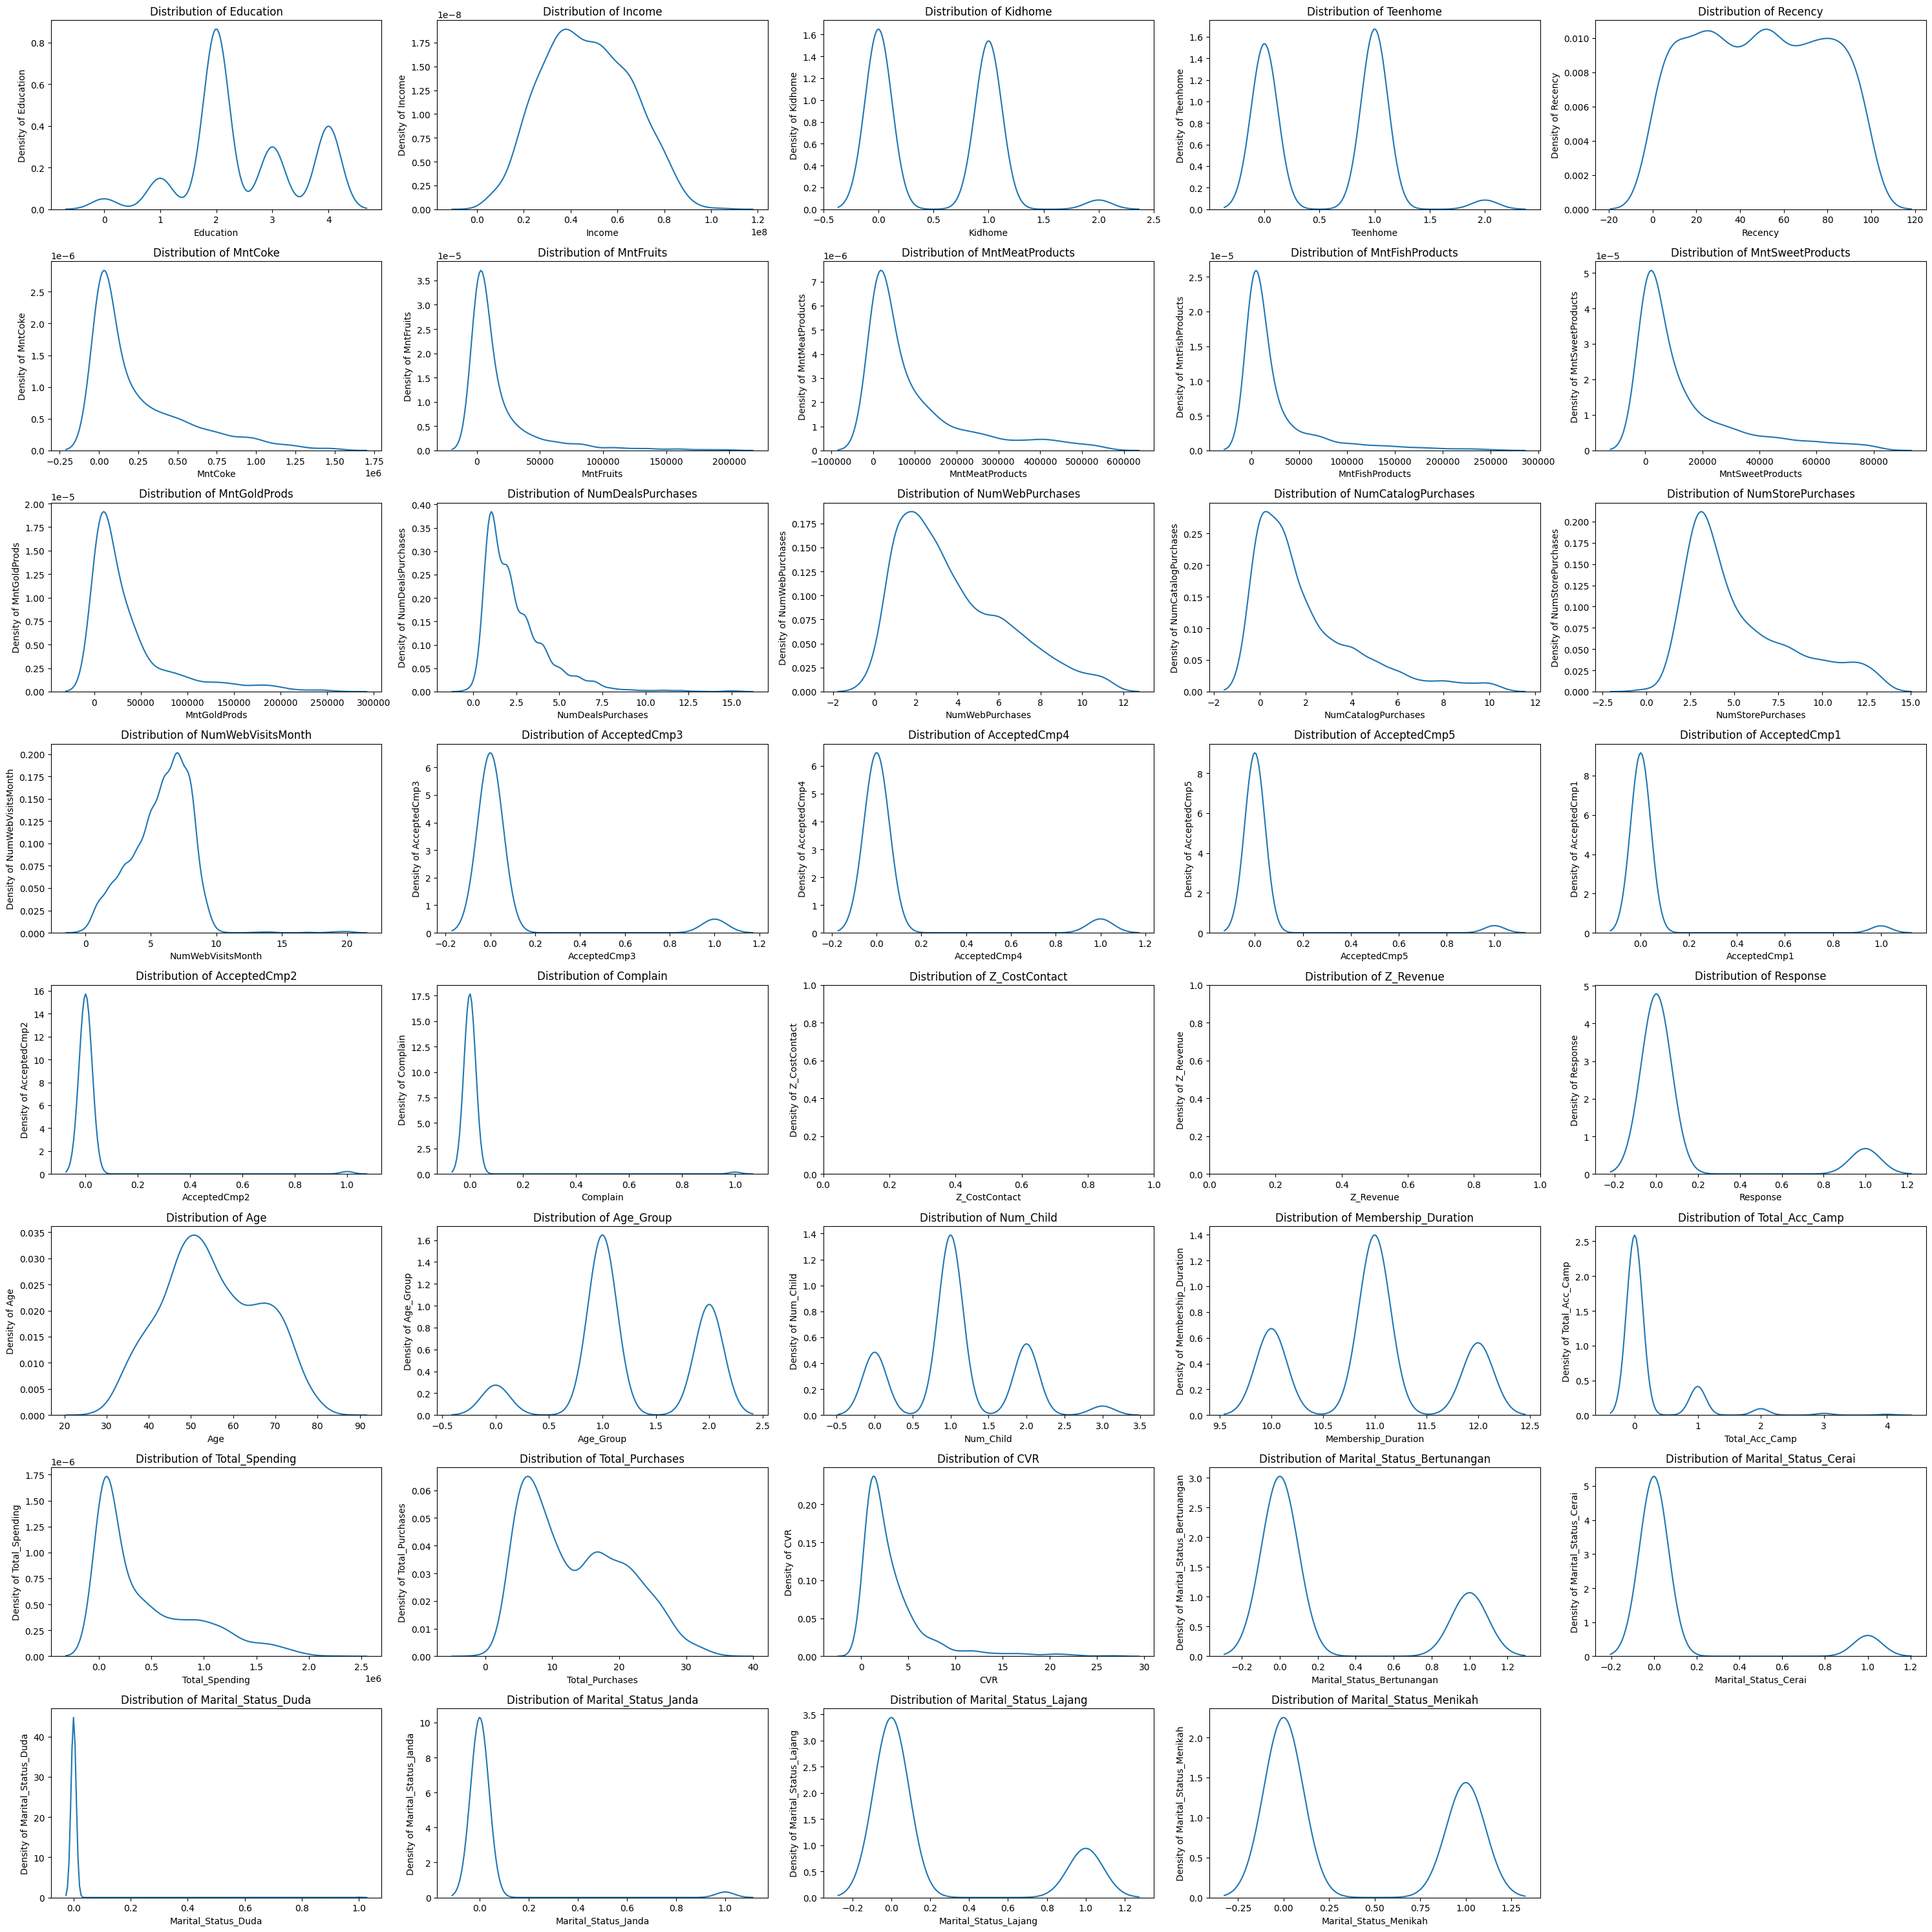

In [67]:
# Kdeplot before scaling
fig, ax = plt.subplots(nrows=8, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(df_preprocessed.columns)) :
    sns.kdeplot(data = df_preprocessed, ax=axes[i], x=df_preprocessed.columns[i])
    axes[i].set_title(f'Distribution of {df_preprocessed.columns[i]}')
    axes[i].set_ylabel(f'Density of {df_preprocessed.columns[i]}')
    axes[i].set_xlabel(f'{df_preprocessed.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_preprocessed.columns) < len(axes):
    axes[len(df_preprocessed.columns)].remove()

plt.tight_layout()
plt.show()

In [68]:
# Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_std_values = ss.fit_transform(df_preprocessed[df_preprocessed.columns])

In [69]:
df_preprocessed = pd.DataFrame(df_std_values, columns=df_preprocessed.columns)
df_preprocessed

Education    Income   Kidhome  Teenhome   Recency   MntCoke  MntFruits  \
0     -0.471204 -0.035126  0.870580  0.807079 -0.369001 -0.759893  -0.550662   
1     -0.471204  1.326298 -0.951860 -1.024596 -0.783785  0.554474   1.076730   
2     -0.471204 -1.096400  0.870580 -1.024596 -0.783785 -0.759893  -0.448950   
3      1.488372  0.608653  0.870580 -1.024596  1.566660 -0.246815   0.873306   
4      0.508584  0.836015 -0.951860  0.807079 -1.129439  0.852186   0.839402   
...         ...       ...       ...       ...       ...       ...        ...   
1856  -0.471204 -0.677505  0.870580 -1.024596  1.117311 -0.785230  -0.482854   
1857   1.488372  0.916885  2.693021  0.807079  0.253176  0.491131  -0.584566   
1858  -0.471204  0.537966 -0.951860 -1.024596  1.462964  2.081041   1.042826   
1859   0.508584  1.198717 -0.951860  0.807079 -1.405962  0.560809   0.432554   
1860   1.488372  0.316423  0.870580  0.807079 -0.299870 -0.528691  -0.482854   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0           -0.732965        -0.553375         -0.679520     -0.665694   
1            0.236809         2.024394          0.418402      0.121215   
2           -0.620759        -0.364181         -0.569728     -0.687552   
3            0.164677         0.487193          0.747779     -0.468967   
4            0.004384        -0.600673          1.571220     -0.490825   
...               ...              ...               ...           ...   
1856        -0.724950        -0.458778         -0.624624     -0.600118   
1857        -0.540613        -0.600673         -0.734416     -0.621977   
1858         0.958129         0.156103         -0.075663     -0.272240   
1859         0.934085         1.291267          0.912467      0.536527   
1860        -0.292158        -0.553375         -0.679520     -0.337815   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             -0.249837        -1.064359            -0.430726   
1             -0.786109         1.608748            -0.001154   
2             -0.249837        -0.682487            -0.860297   
3              1.358977         0.463131             0.428417   
4             -0.249837         0.845003             0.857989   
...                 ...              ...                  ...   
1856          -0.786109        -1.064359            -0.860297   
1857           2.431520         1.608748            -0.001154   
1858          -0.786109        -0.682487             0.428417   
1859          -0.249837         0.845003             1.287561   
1860           0.286434        -0.300614            -0.430726   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -1.079434          -0.355322     -0.275177     -0.277430   
1              1.529855          -0.803022     -0.275177     -0.277430   
2             -0.427111           0.092379     -0.275177     -0.277430   
3              0.225211          -0.355322     -0.275177     -0.277430   
4              1.529855           0.092379     -0.275177     -0.277430   
...                 ...                ...           ...           ...   
1856          -1.079434           0.540080     -0.275177     -0.277430   
1857          -0.100950           0.540080     -0.275177     -0.277430   
1858           2.508338           0.092379     -0.275177      3.604508   
1859           1.529855          -1.250723     -0.275177     -0.277430   
1860          -0.427111           0.540080     -0.275177     -0.277430   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
1         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
2         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
3         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
4         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
...            ...           ...    

In [70]:
# Re-check the mean and standard deviation after standardization
df_preprocessed.describe().transpose()[['mean', 'std']]

mean       std
Education                  -1.240873e-16  1.000269
Income                     -1.756312e-16  1.000269
Kidhome                     1.088150e-16  1.000269
Teenhome                    0.000000e+00  1.000269
Recency                     1.221782e-16  1.000269
MntCoke                    -4.199876e-17  1.000269
MntFruits                  -1.336324e-17  1.000269
MntMeatProducts            -3.818070e-18  1.000269
MntFishProducts            -7.636139e-18  1.000269
MntSweetProducts           -5.345297e-17  1.000269
MntGoldProds                4.199876e-17  1.000269
NumDealsPurchases          -1.450866e-16  1.000269
NumWebPurchases             1.336324e-17  1.000269
NumCatalogPurchases         7.636139e-17  1.000269
NumStorePurchases           1.909035e-18  1.000269
NumWebVisitsMonth           1.679951e-16  1.000269
AcceptedCmp3               -2.863552e-17  1.000269
AcceptedCmp4                8.781560e-17  1.000269
AcceptedCmp5               -3.054456e-17  1.000269
AcceptedCmp1                7.636139e-17  1.000269
AcceptedCmp2                9.545174e-18  1.000269
Complain                    4.056699e-17  1.000269
Z_CostContact               0.000000e+00  0.000000
Z_Revenue                   0.000000e+00  0.000000
Response                    3.054456e-17  1.000269
Age                        -1.622680e-16  1.000269
Age_Group                   0.000000e+00  1.000269
Num_Child                  -1.489047e-16  1.000269
Membership_Duration         7.788862e-16  1.000269
Total_Acc_Camp              7.492961e-17  1.000269
Total_Spending              3.818070e-18  1.000269
Total_Purchases             4.390780e-17  1.000269
CVR                        -8.017946e-17  1.000269
Marital_Status_Bertunangan  7.874768e-17  1.000269
Marital_Status_Cerai       -3.197633e-17  1.000269
Marital_Status_Duda         1.909035e-17  1.000269
Marital_Status_Janda       -4.486232e-17  1.000269
Marital_Status_Lajang       4.868039e-17  1.000269
Marital_Status_Menikah     -5.727104e-18  1.000269

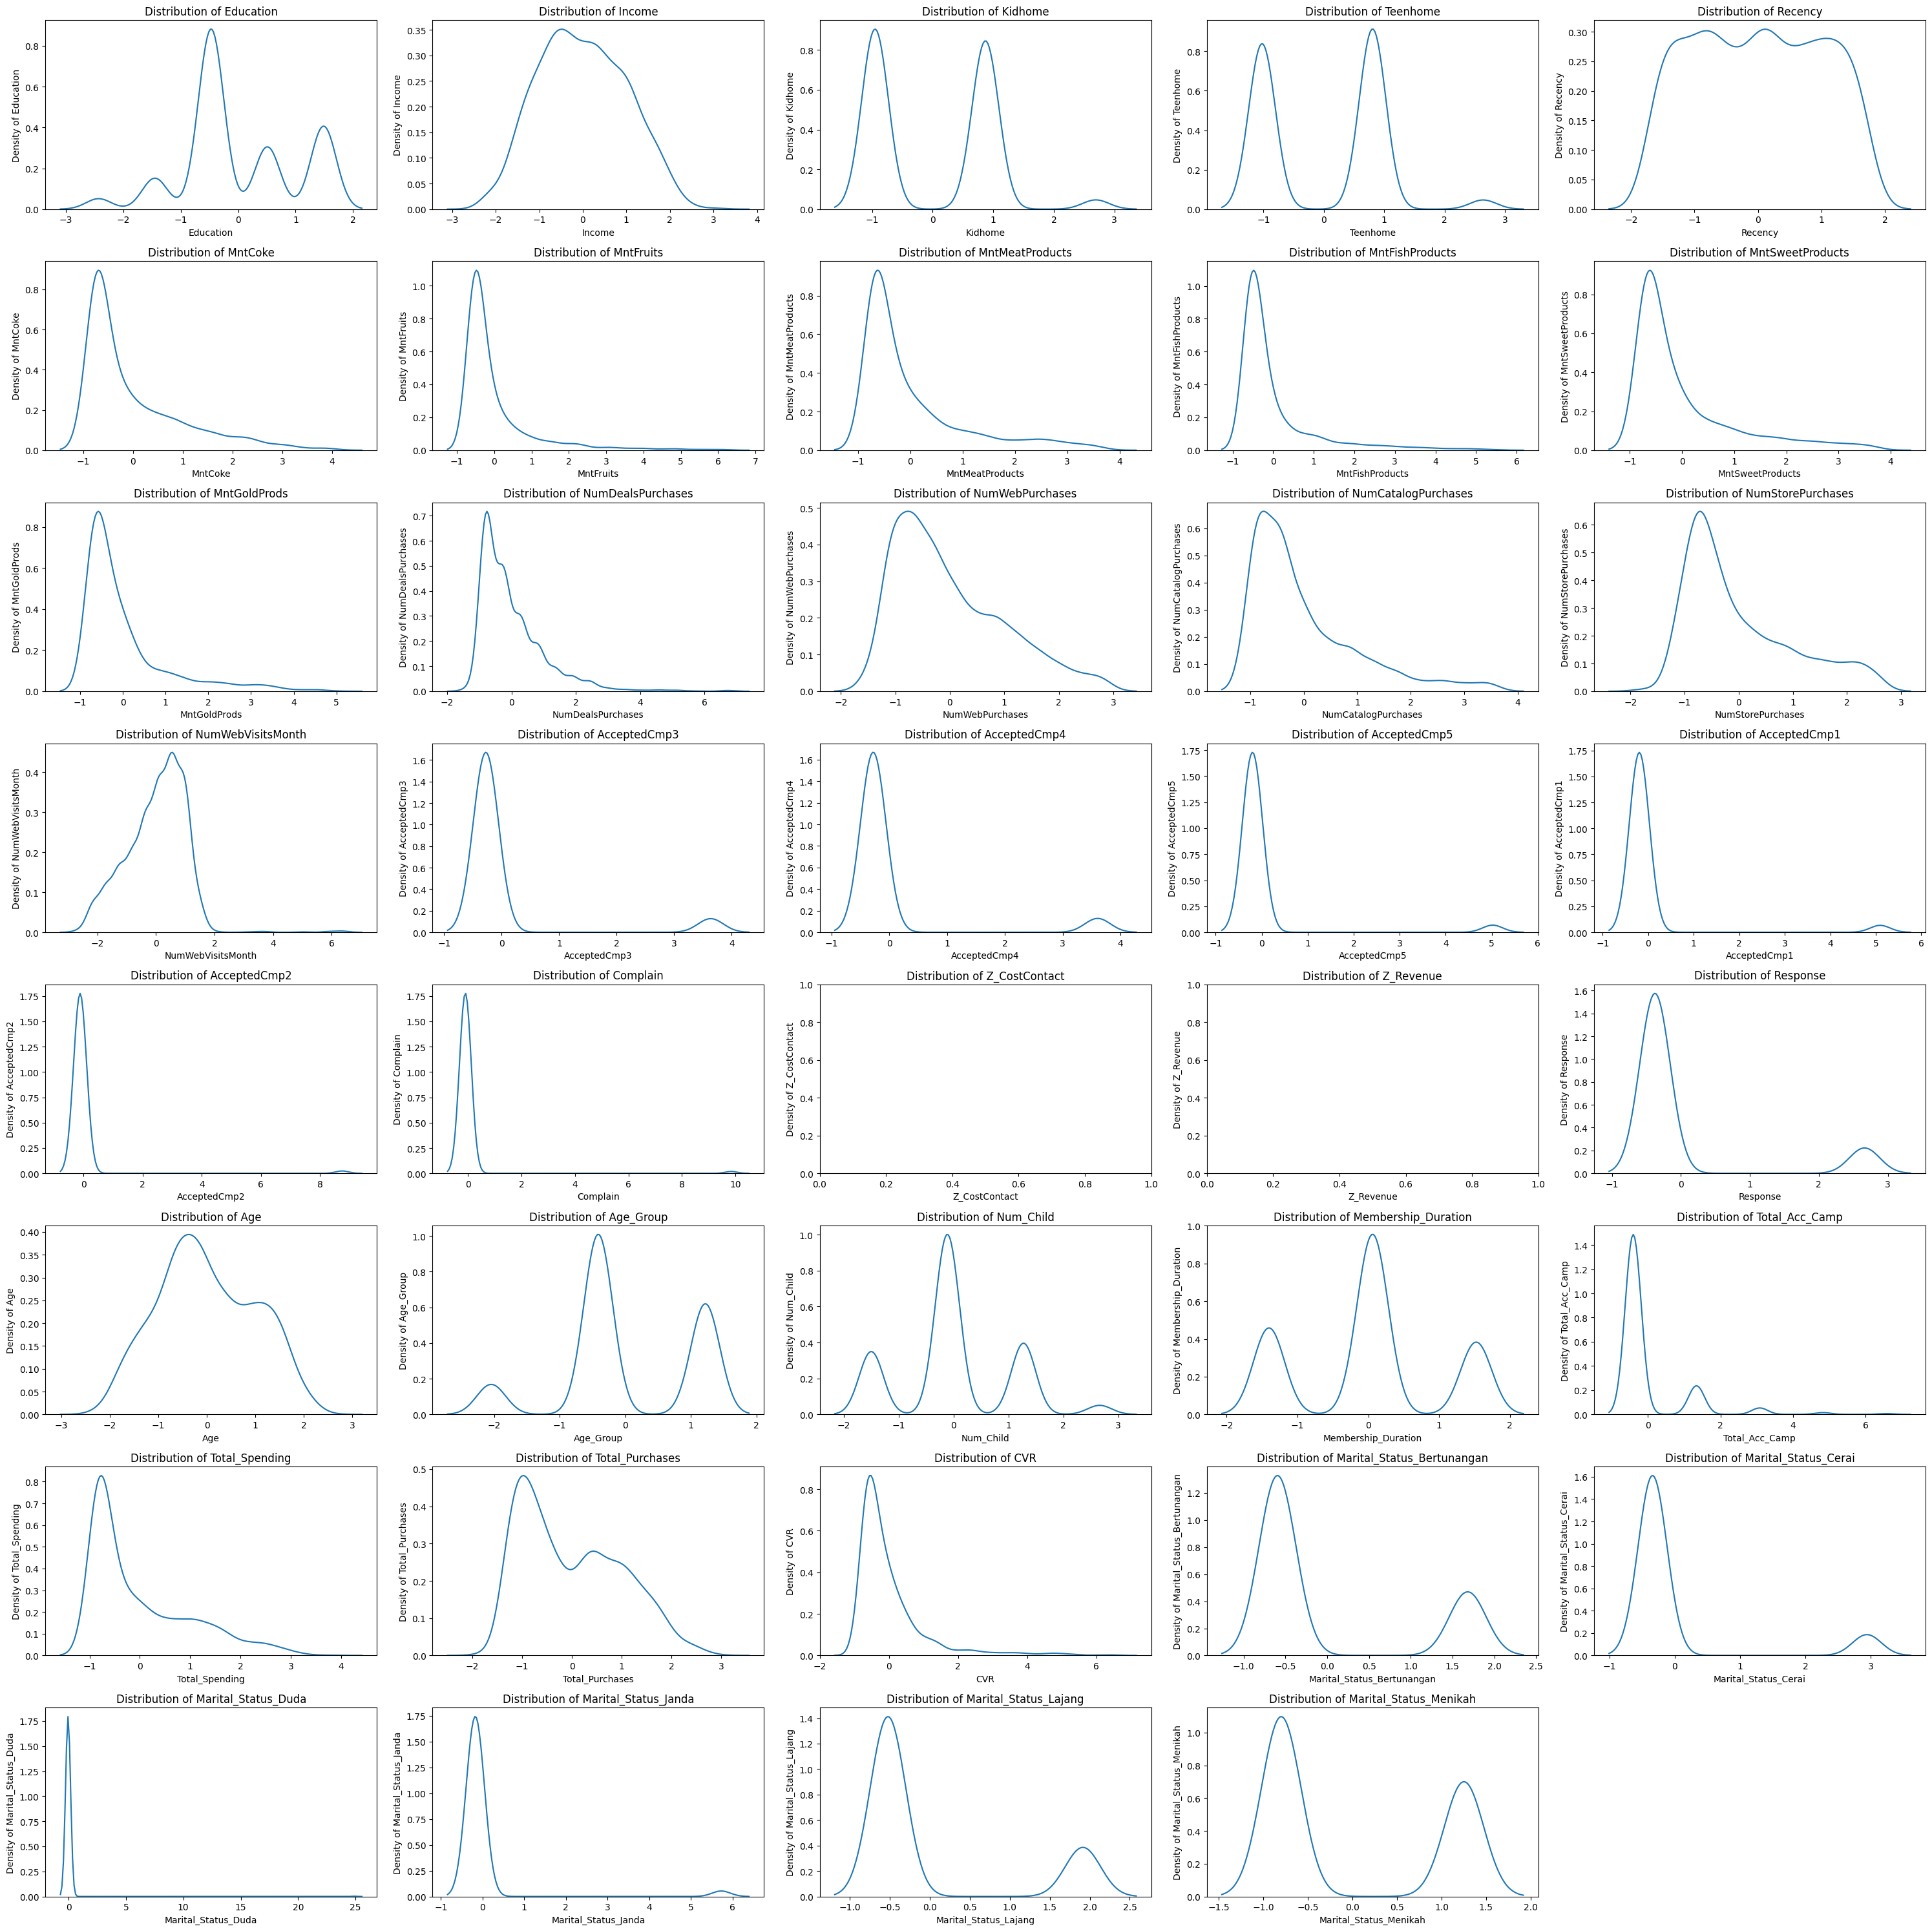

In [71]:
#Kdeplot after scaling
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(df_preprocessed.columns)) :
    sns.kdeplot(data = df_preprocessed, ax=axes[i], x=df_preprocessed.columns[i])
    axes[i].set_title(f'Distribution of {df_preprocessed.columns[i]}')
    axes[i].set_ylabel(f'Density of {df_preprocessed.columns[i]}')
    axes[i].set_xlabel(f'{df_preprocessed.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_preprocessed.columns) < len(axes):
    axes[len(df_preprocessed.columns)].remove()

plt.tight_layout()
plt.show()

# **Task 3 : Clustering With K-means**

In [72]:
# Make copy of dataframe
df_model = df_preprocessed.copy()

## PCA

Because we have so many features, we will need to reduce them without throwing information away using PCA.

In [73]:
from sklearn.decomposition import PCA 

# Fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# Transform data 
data_pca = pca.transform(df_model)
df_pca = pd.DataFrame(data_pca, columns = ['PC 1', 'PC 2'])

In [74]:
df_pca

PC 1      PC 2
0    -2.587152 -0.998126
1     3.024975  1.310683
2    -2.761262  1.390020
3     0.644242  0.418779
4     2.154105 -0.732314
...        ...       ...
1856 -3.164284  1.251430
1857  0.425386 -4.400199
1858  3.170721  1.311976
1859  3.687071 -0.933981
1860 -1.314482 -2.478061

[1861 rows x 2 columns]

## Finding Optimal Cluster Using Elbow Method and Silhouette Score

Text(0.5, 0, 'Number of Cluster')

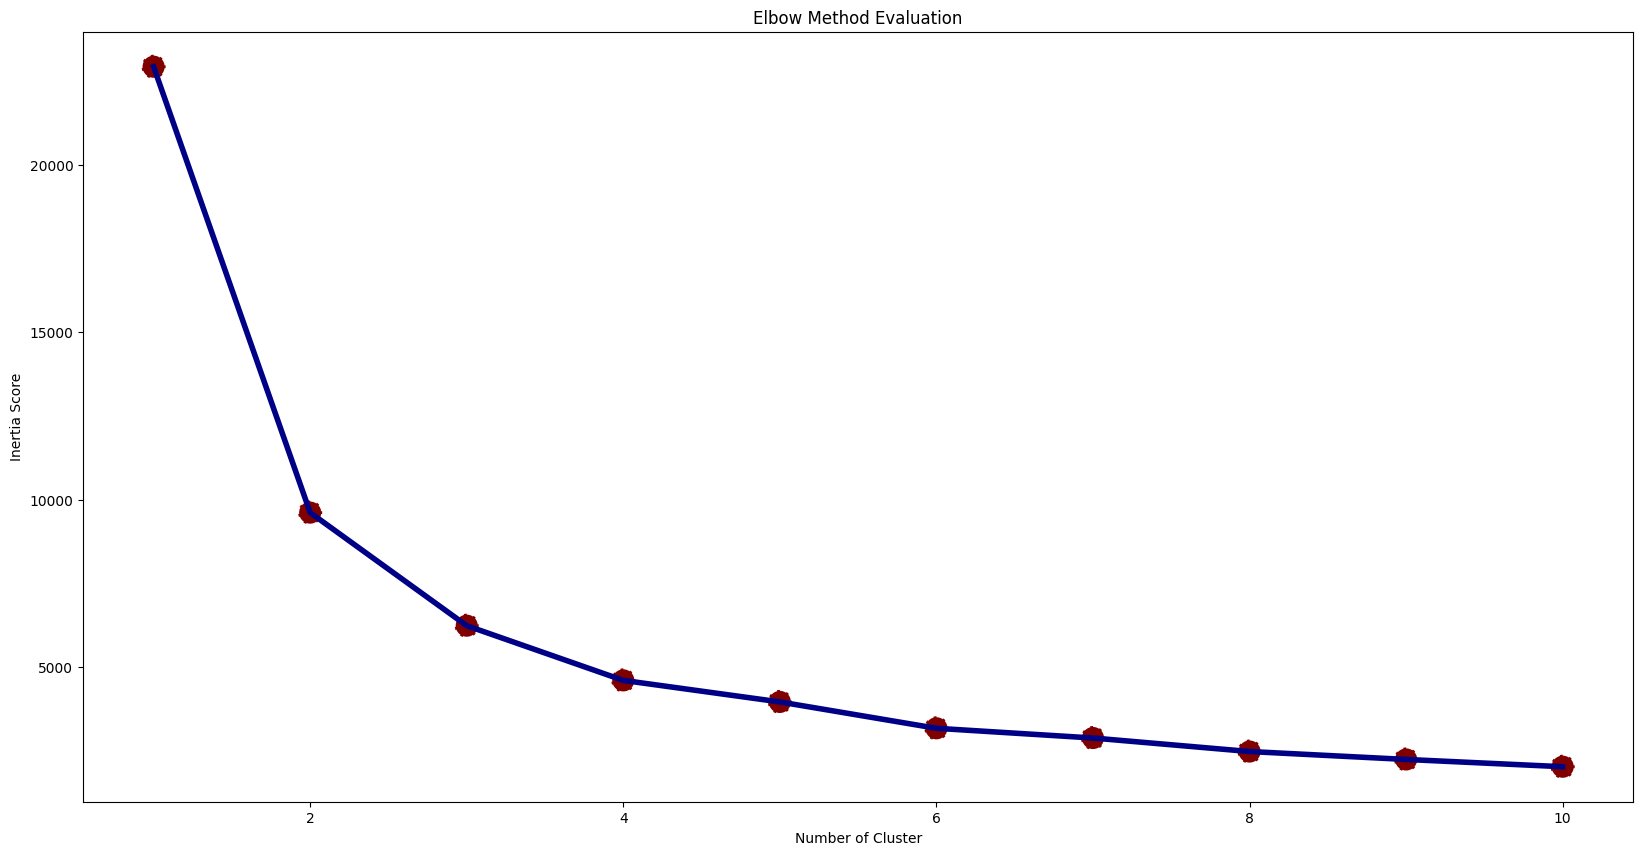

In [75]:
# Elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

plt.title('Elbow Method Evaluation')
plt.ylabel('Inertia Score')
plt.xlabel('Number of Cluster')

In [76]:
#List of inertias
df_inertia = pd.DataFrame(inertia)
df_inertia

0
0  22916.944608
1   9615.880262
2   6243.213356
3   4611.676218
4   3968.961720
5   3182.329124
6   2892.367497
7   2489.245178
8   2253.116665
9   2036.190863

In [77]:
# Inertia reduction by cluster in percentage
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    58.040304
1    35.073928
2    26.132971
3    13.936679
4    19.819607
5     9.111617
6    13.937452
7     9.485948
8     9.627810
9          NaN
dtype: float64

In [78]:
?KElbowVisualizer

Object `KElbowVisualizer` not found.


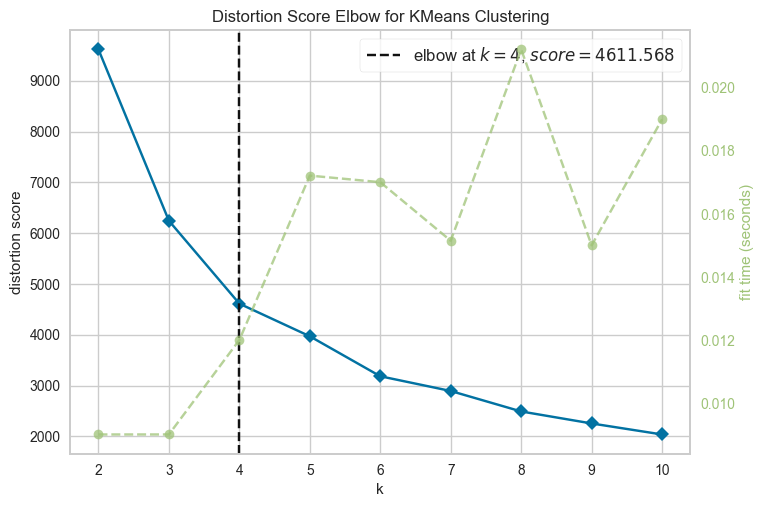

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Visualization with parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
model = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
kev = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)

# Fit the visualizer to the data
kev.fit(df_pca)

# Visualize the elbow plot
kev.show()

In [80]:
kev.elbow_score_

4611.567796377625

In [81]:
kev.elbow_value_

4

> Based on elbow method inertia value, the optimal number of cluster is 4.

**Additional Information About Distortion Score**

> Note : I just learned that distortion score is actually the same with inertia.

The distortion score, also known as inertia in the context of K-means clustering, is a metric that measures the sum of squared distances between each data point and its nearest centroid. It reflects how compact the clusters are, with lower values indicating tighter, more cohesive clusters.

Here's how the distortion score can be used to determine the appropriate number of clusters:

1. **Elbow Method**: One common approach is the "Elbow Method." In this method, you plot the distortion scores for different numbers of clusters and look for the point where the rate of decrease in distortion begins to slow down (forming an "elbow" shape). This point is often considered a good estimate for the optimal number of clusters.

2. **Optimal Number of Clusters**: The rationale behind the Elbow Method is that as you increase the number of clusters, the distortion score tends to decrease because the centroids are closer to individual data points. However, beyond a certain point, adding more clusters may only marginally reduce the distortion score as the improvement in compactness diminishes. The "elbow" point represents the trade-off between minimizing distortion and avoiding overly complex models.

3. **Interpretation**: It's important to interpret the Elbow Method results cautiously. Sometimes, the "elbow" point may not be clearly defined, or there may be multiple potential elbow points. In such cases, domain knowledge, visual inspection of clustering results, and consideration of other metrics (such as silhouette score) can provide additional insights into choosing the optimal number of clusters.

In summary, the distortion score (inertia) is a useful metric for evaluating the quality of K-means clustering and determining the appropriate number of clusters. By observing how the distortion score changes with the number of clusters and identifying the "elbow" point, you can make an informed decision about the optimal clustering solution for your data.

## Clustering Process Using K-means

In [82]:
# Fit cluster into our scaled dataframe
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_pca.values)

KMeans(n_clusters=4, random_state=42)

In [83]:
# Assign the cluster to our original dataframe and scaled dataframe
df_pca['Clusters'] = kmeans.labels_
df_filtered_outliers['Clusters'] = kmeans.labels_

Text(0.5, 1.0, 'Cluster Segmentation')

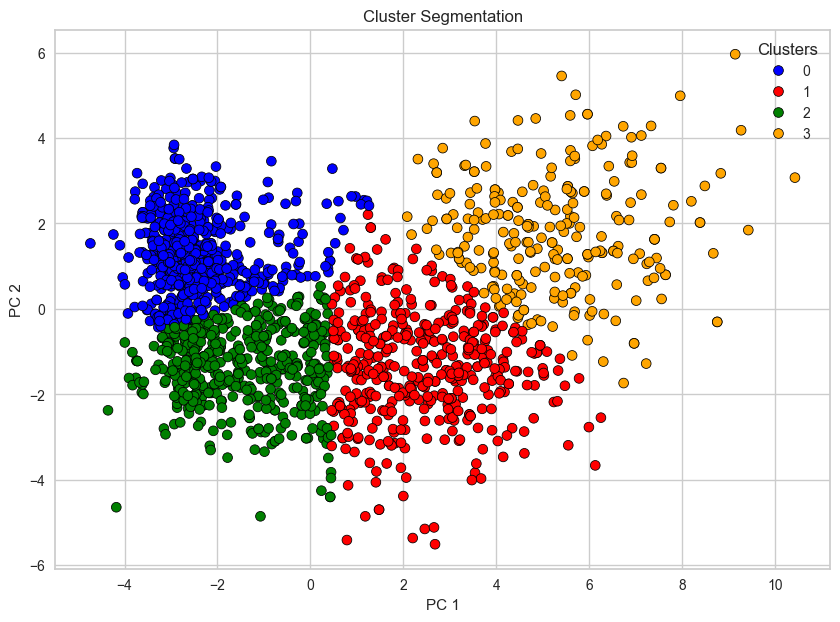

In [84]:
# Segmentation visualization (4 cluster)
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data = df_pca, x='PC 1', y='PC 2', edgecolor='black', hue='Clusters', palette=['blue','red','green','orange'])
plt.title('Cluster Segmentation')

## Model Evaluation

In [85]:
# Visualize silhouette score in heatmap
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

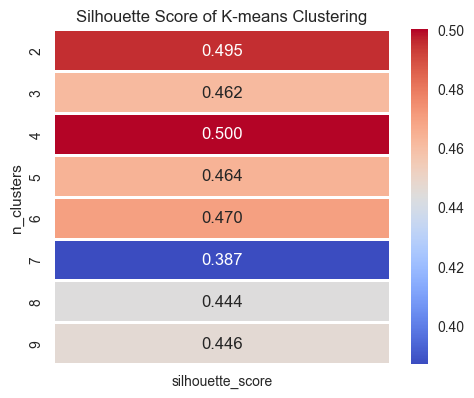

In [86]:
visualize_silhouette_layer(df_pca)

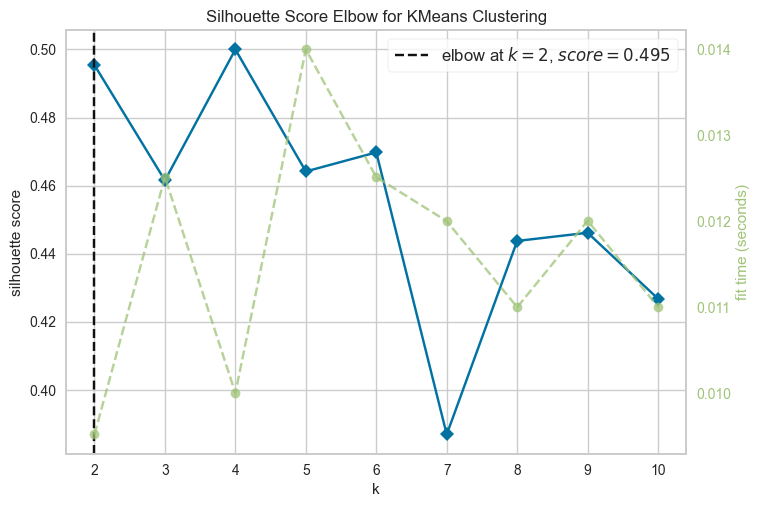

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [87]:
# Visualization with silhouette score
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
model = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
kev = KElbowVisualizer(model, metric='silhouette', distance_metric='euclidean', timings=True, locate_elbow=True)

# Fit the visualizer to the data
kev.fit(df_pca)

# Visualize the elbow plot
kev.show()

The locate_elbow parameter got it wrong here, the optimal cluster in the graph should be 4 with the highest silhouette score.

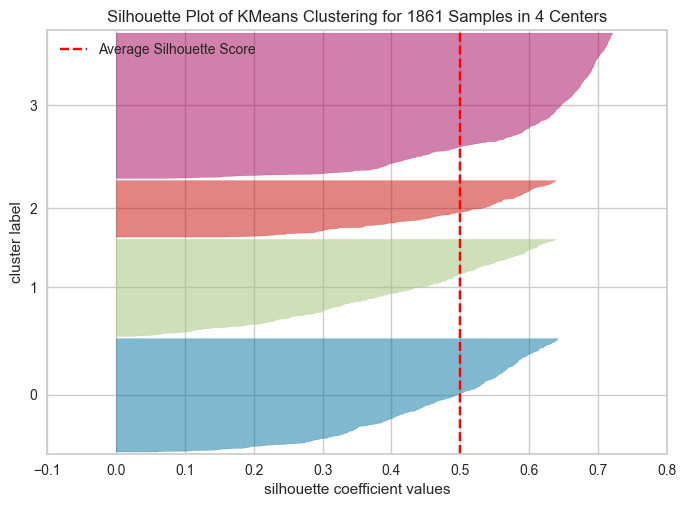

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1861 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
#Silhouetter plot (4 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

**Major Findings:**

- Based on the Silhouette Score, the recommended optimal number of clusters is 4.
- The Silhouette Score for this number of clusters is higher compared to other numbers of clusters, indicating better clustering quality. Silhouette Score is an evaluation metric that describes how well objects within one cluster are grouped within their own data compared to other clusters. The higher the Silhouette Score, the better the separation of clusters.

# **Task 4 : Customer Personality Analysis For Marketing Retargeting**

In [89]:
# See original dataframe grouped with cluster aggregated by mean and median

summary_feature_exc_cluster = ['Total_Acc_Camp', 'NumWebVisitsMonth', 'Income', 'Total_Spending', 'Total_Purchases', 'CVR']
summary_feature = ['Total_Acc_Camp', 'NumWebVisitsMonth', 'Income', 'Total_Spending', 'Total_Purchases', 'CVR', 'Clusters']

agg_funcs = {
    'Total_Acc_Camp': 'sum',
    'NumWebVisitsMonth': 'sum',
    'Income': 'mean',
    'Total_Purchases': 'mean',
    'Total_Spending': ['mean', 'median'],
    'CVR': 'mean'
}

result = round(df_filtered_outliers[summary_feature].groupby('Clusters').agg(agg_funcs), 2)
# result.columns = ['Total_Acc_Camp_Sum', 'NumWebVisitsMonth_Sum', 'Income_Mean', 'Total_Purchases_Mean', 
#                   'Total_Spending_Mean', 'Total_Spending_Median', 'CVR_Mean']

# Display the result
display(result)

Total_Acc_Camp NumWebVisitsMonth       Income Total_Purchases  \
                    sum               sum         mean            mean   
Clusters                                                                 
0                    54              4330  30850664.63            7.27   
1                   137              2401  60374070.78           21.73   
2                    49              3263  43200811.52           11.17   
3                   188               788  73171756.86           20.55   

         Total_Spending              CVR  
                   mean     median  mean  
Clusters                                  
0              88778.96    57000.0  1.24  
1             816116.44   757500.0  4.52  
2             182279.30   140000.0  1.88  
3            1221211.76  1180000.0  9.25

> Different aggregation function is used based on the business context and original data distribution. Columns that are used for analysis also chosen based on business requirements and experiment whether there are significant differences or not (ex : age and recency column is not included because there are almost no difference in each cluster)

## Cluster Interpretation

Customer Segmentation:

- Cluster 0:
    - Has the lowest number of transactions and spending, with only about 7 transactions and Rp.57,000 per month.
    - Has the lowest income, mostly Rp.30,850,000 per year.
    - Responds to campaigns quite low, only 54 times.
    - The largest total visits which is 4,330 visits.
    - Has the lowest conversion rate, only 1.24%.

- Cluster 1:
    - Has high numbers of transactions and spending, with about 21 transactions and Rp.757,500 per month.
    - Has a fairly high income, mostly Rp.60,374,000 per year.
    - Responds to campaigns quite frequently, only 137 times.
    - The moderate total visits which is 2,401 visits.
    - Has a moderate conversion rate, 4.52%.

- Cluster 2:
    - Has moderate numbers of transactions and spending, about 11 transactions and Rp.140,200 per month.
    - Has a moderate income, mostly Rp.43,200,000 per year.
    - Responds to campaigns the least, only 49 times.
    - The fairly high total visits which is 3,263 visits.
    - Has a relatively low conversion rate, only 1.88%.

- Cluster 3:
    - Has high numbers of transactions and spending, about 20 transactions and Rp.1,180,000 per month.
    - Has the highest income, mostly Rp.73,171,000 per year.
    - Responds to the most campaigns, 188 times.
    - The smallest total visits which is 788 visits.
    - Has the highest conversion rate, 9.25%.

Based on the characteristics for each cluster, we can name them as follows:

- **Cluster 0: Low Spenders**
- **Cluster 1: Moderate Spenders Responsive**
- **Cluster 2: Moderate Spenders Non-Responsive**
- **Cluster 3: High Spenders**

In [90]:
df_cluster_interpret = df_filtered_outliers[summary_feature]
df_cluster_interpret.sample(5)

Total_Acc_Camp  NumWebVisitsMonth      Income  Total_Spending  \
179                1                  2  78497000.0          978000   
386                1                  7  43795000.0          492000   
1688               0                  6  58350000.0         1001000   
921                0                  1  72354000.0         1228000   
2043               0                  5  45057000.0           50000   

      Total_Purchases    CVR  Clusters  
179                25  12.50         3  
386                17   2.43         1  
1688               27   4.50         3  
921                19  19.00         3  
2043                6   1.20         0

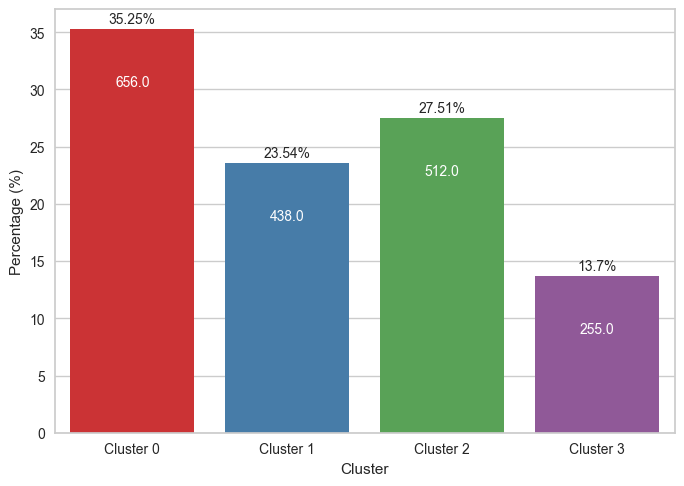

In [91]:
# Visualize count and percentage of each clusters

cluster_amount = df_cluster_interpret['Clusters'].value_counts().reset_index()
cluster_amount.columns = ['Cluster', 'Count']
cluster_amount['Percentage (%)'] = round((cluster_amount['Count']/len(df_cluster_interpret))*100, 2)
cluster_amount = cluster_amount.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_amount

ax = sns.barplot(data = cluster_amount, y='Percentage (%)', x='Cluster', palette='Set1')

# Add annotations to each bar for percentage
for index, value in enumerate(cluster_amount['Percentage (%)']):
    ax.text(index, value + 0.5, f'{value}%', ha='center', fontsize=10)

# Add annotations to each bar for count
for index, row in cluster_amount.iterrows():
    ax.text(index, row['Percentage (%)'] - 5, f'{row["Count"]}', ha='center', fontsize=10, color='white')

# ax.set_ylabel(None)
plt.xticks([0, 1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

**Major Findings :**

- The low-spender group in our business has the highest number of customers which is around 35.25%.
- The high-spender group constitutes only around 13.7% of the customer base, so it's important for the company to focus on maximizing the value derived from this segment.
- The moderate spender groups have similar numbers to each other, with the group with low activity having slightly more. However, considering the significant number of visits for both of these groups, the company can develop suitable marketing strategies.

In [92]:
?sns.boxenplot

Signature:
sns.boxenplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    linewidth=None,
    linecolor=None,
    width_method='exponential',
    k_depth='tukey',
    outlier_prop=0.007,
    trust_alpha=0.05,
    showfliers=True,
    hue_norm=None,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    scale=<deprecated>,
    box_kws=None,
    flier_kws=None,
    line_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw an enhanced box plot for larger datasets.

This style of plot was originally named a "letter value" plot because it
shows a large number of quantiles that are defined as "letter values".  It
is similar to a box plot in plotting a nonparametric representation of a
distribution in which all features correspond to actual observations. By
plotting more quantile

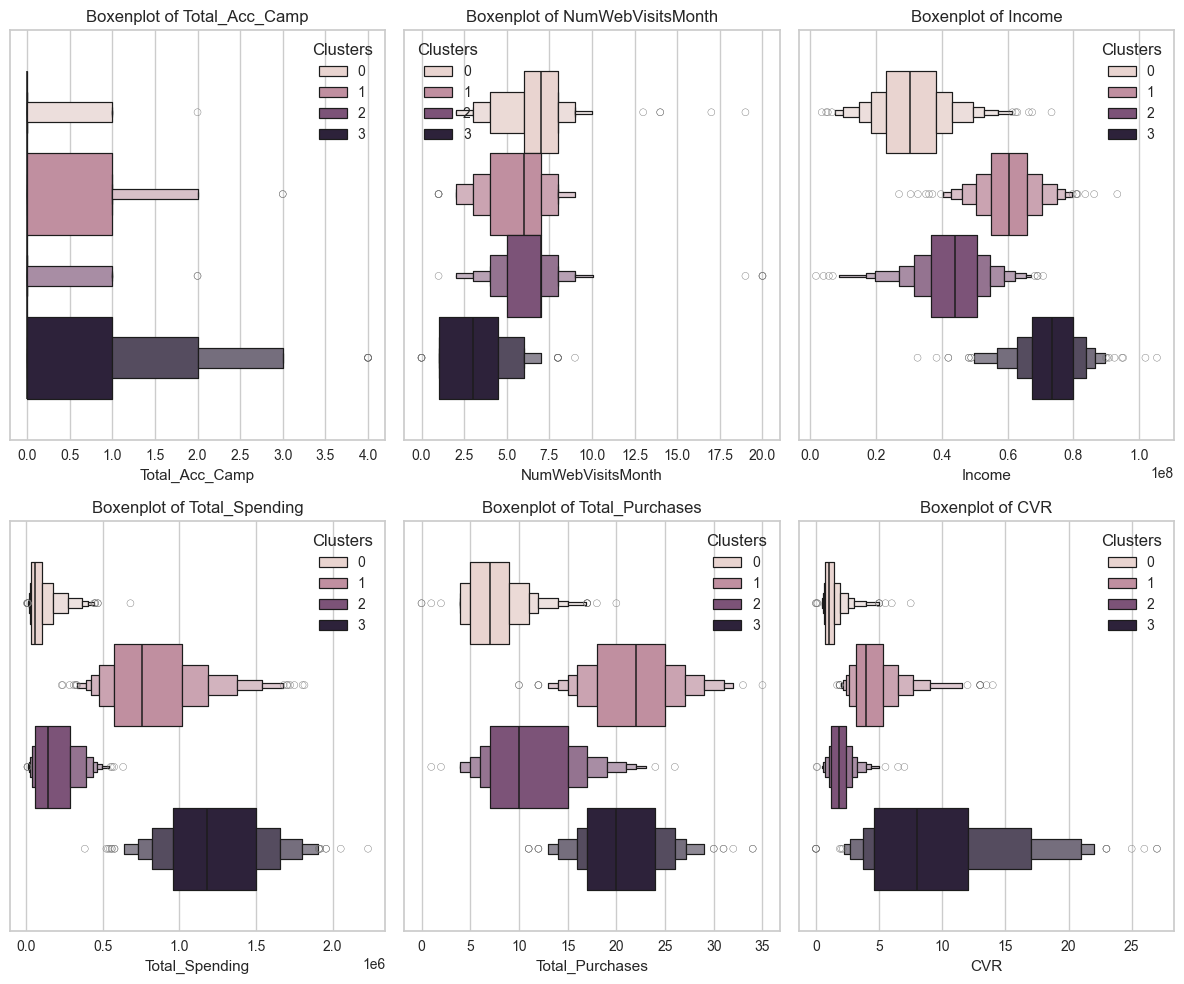

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
ax = ax.flatten()

for i in range(len(summary_feature_exc_cluster)) :
    sns.boxenplot(data=df_cluster_interpret, ax=ax[i], x=summary_feature_exc_cluster[i], orient='h', hue='Clusters')
    ax[i].set_title(f'Boxenplot of {summary_feature_exc_cluster[i]}')

plt.tight_layout()
plt.show()

**Major Findings :**

- The Low Spenders or Cluster 0 exhibit a high distribution of website visits but have the lowest total acceptance campaign and conversion rates. This suggests that this group frequently visits the company's website but may not fully realize or be responsive to the campaigns offered. Considering this group has the largest population, the company needs to develop the right strategy to capture their attention and increase their engagement. Further analysis may be needed to understand the reasons behind the low acceptance campaign within this group.

- The cluster that responds the most to campaigns is the High Spenders or Cluster 3 with the highest conversion rates. This indicates that the majority of customers in this group are very responsive to the campaigns offered by the company and indeed have a high buying intent, likely correlated with their very high income. This could be a good opportunity to increase interaction and purchases from this group by launching more attractive and relevant campaigns according to their preferences.

- Moderate Spenders or Clusters 1 and 2 are quite tricky to analyze because the majority of their customers neither visit the company's website too often nor too rarely, but they have moderate and low conversion rate distributions. The difference between the two lies in spending habits, where Cluster 1 indeed has more intense spending habits compared to Cluster 2. The company can leverage this information to design campaign strategies that target the middle to lower income groups more effectively.

## Business Recommendation

Based on the characteristics that we have explored for each cluster, specific business recommendations for each cluster are:

**Cluster 0: Low Spenders**
1. **Targeted Campaigns**
<br>Develop personalized and targeted campaigns to increase engagement and conversion rates among this group. Since they visit the website frequently but have low responsiveness to campaigns, analyzing their behavior further can help tailor campaigns to their preferences and needs.

2. **Enhanced User Experience**
<br>Improve the website's user experience to make it more engaging and user-friendly for this segment. This could involve simplifying the purchasing process, providing personalized recommendations, or offering incentives to encourage repeat visits and purchases.

**Cluster 1: Moderate Spenders Responsive**
1. **Upselling and Cross-selling**
<br>Implement upselling and cross-selling strategies to increase the average transaction value for this segment. Since they already have a relatively high number of transactions and spending, enticing them with complementary or higher-value products/services can boost revenue.

2. **Campaign Optimization**
<br>Continuously optimize marketing campaigns to maintain their relatively high responsiveness. Analyze past campaign performance to identify patterns and preferences, then tailor future campaigns accordingly to maximize engagement and conversion rates.

**Cluster 2: Moderate Spenders Non-Responsive**
1. **Reactivation Campaigns**
<br>Launch reactivation campaigns targeting this segment to encourage them to increase their activity and engagement with the company. Offering special promotions or discounts can incentivize them to make more transactions and visits to the website.

2. **Content Marketing**
<br>Invest in content marketing strategies to increase awareness and engagement among this group. Providing valuable and informative content through blog posts, guides, or tutorials can attract their interest and encourage them to interact more with the company's offerings.

**Cluster 3: High Spenders**
1. **Exclusive Offers**
<br>Provide exclusive offers or loyalty programs to reward and retain this segment of high spenders. Offering VIP perks, early access to new products, or personalized discounts can strengthen their loyalty and increase their lifetime value to the business.

2. **Personalized Services**
<br>Offer personalized services such as dedicated account managers or concierge services to enhance the customer experience for high spenders. Providing tailored assistance and support can further solidify their satisfaction and encourage repeat purchases.

# **Further Project Development**

As for the potential for further development of this project is to use machine learning to predict which customers will accept the next campaign based on the categorization of the number of campaigns that have been accepted before so that companies can reduce marketing costs by targeting marketing only to customers who have a tendency to be interested in company campaigns.